In [1]:
#!/usr/bin/python
#coding=utf-8
import numpy as np
import pandas as pd
import csv
import re
import os
import sys
import operator
import datetime
import time
import matplotlib.pyplot as plt
from datetime import *
from matplotlib import *
style.use("ggplot")
from csv import *
from openpyxl import *
from xlrd import *

In [2]:
#grep rows with suffix "_G"
filename1 = 'bigdata_correct.xlsx'
df = pd.read_excel(filename1, sheetname='Data')
df = df[df.IdentNo.str[-2:] == "_G"]

In [3]:
# Add two more columns to the data-frame
df = df.values
a,b = df.shape
z = np.zeros((a,2))
df = np.hstack((df,z))
a,b = df.shape

In [4]:
#list all different types of products
list1 = []
list_process_number = []
ttnr_list = []
for varia in range(a):
    vari = str(df[varia][2]) + "_" + str(df[varia][3])
    v1 = str(df[varia][2])
    v2 = str(df[varia][3])
    t = len(list1)
    flag = 0
    for i in range(t):
        if list1[i] == vari:
            flag = 1
            break
    if (flag == 0):
        list1.append(vari)
        list_process_number.append(v1)
        ttnr_list.append(v2)
unique_sets = len(list1)
print (list1)
print (unique_sets)

['116_1038408484', '115_1038307052', '116_1038307052', '115_1038305585', '116_1038305585', '115_1038408318', '116_1038408318', '115_1038408484', '115_1038305594', '115_1038407804', '116_1038305594', '116_1038407804', '115_1038407806', '116_1038407806', '115_1038408272', '115_1038408104', '116_1038408272', '116_1038408104', '115_1038407334', '115_F005V16903', '116_1038407334', '115_1038408462', '116_1038408462', '115_1038407754', '116_1038407754', '115_1038305588', '116_1038305588', '115_1038407332', '116_1038407332', '115_1038408840', '116_1038408840', '115_1038305359', '116_1038305359']
33


In [5]:
#assigning product number depending on TTNR to the data-set
for i in range(a):
    concat= str(df[i][2]) + "_" + str(df[i][3])
    for ii in range(unique_sets):
        if (list1[ii] == concat):
            df[i][4] = ii + 1
            break

In [6]:
timers = 180
a,b = df.shape

flag = 0
count = 0
value_prev = "0"
date_prev = "0"
final_array = []
total_size = 0

for i in range(a):
    total_size += 1
    if flag == 0:
        final_array.append([])
        final_array[count].append(df[i][4])
        final_array[count].append(df[i][1])
        total_size = 1
        flag = 1
    elif df[i][4] != value_prev:
        final_array[count].append(date_prev)
        final_array[count].append(total_size - 1)
        count += 1
        final_array.append([])
        final_array[count].append(df[i][4])
        final_array[count].append(df[i][1])
        total_size = 1
    else:
        t1 = pd.to_datetime(date_prev)
        t2 = pd.to_datetime(df[i][1])
        time = pd.Timedelta(t2 - t1).seconds + pd.Timedelta(t2 - t1).days*24*60*60
        if (time > timers):
            final_array[count].append(date_prev)
            final_array[count].append(total_size - 1)
            count = count + 1
            final_array.append([])
            final_array[count].append(df[i][4])
            final_array[count].append(df[i][1])
            total_size = 1
    df[i][5] = count + 1
    value_prev = df[i][4]
    date_prev = df[i][1]
    if (i == a-1):
        final_array[count].append(date_prev)
        final_array[count].append(total_size - 1)

print (final_array)
print (df)
np.savetxt("product_type_correct.csv", df, fmt="%s", delimiter=",")
np.savetxt("timelist_correct.csv", final_array, fmt="%s", delimiter=",")

'''
final_array
[product type number, starting time_stamp, ending time_stamp, number of entries in each batch/ Batch Quantity]
df
[product_name, time_stamp, process_number, TTNR, product type number ,batch/group number]
'''

[[1, Timestamp('2018-04-02 06:34:01'), Timestamp('2018-04-02 06:44:06'), 14], [1, Timestamp('2018-04-02 06:47:38'), Timestamp('2018-04-02 06:47:38'), 1], [1, Timestamp('2018-04-02 06:50:51'), Timestamp('2018-04-02 06:52:45'), 5], [1, Timestamp('2018-04-02 06:56:41'), Timestamp('2018-04-02 06:57:33'), 3], [1, Timestamp('2018-04-02 07:05:56'), Timestamp('2018-04-02 07:07:26'), 3], [1, Timestamp('2018-04-02 07:17:38'), Timestamp('2018-04-02 07:19:06'), 3], [1, Timestamp('2018-04-02 07:23:03'), Timestamp('2018-04-02 07:23:42'), 2], [1, Timestamp('2018-04-02 07:30:15'), Timestamp('2018-04-02 07:51:57'), 29], [1, Timestamp('2018-04-02 08:09:20'), Timestamp('2018-04-02 08:40:07'), 41], [1, Timestamp('2018-04-02 08:47:04'), Timestamp('2018-04-02 08:48:39'), 5], [1, Timestamp('2018-04-02 09:01:21'), Timestamp('2018-04-02 09:02:08'), 3], [2, Timestamp('2018-04-02 09:27:57'), Timestamp('2018-04-02 09:36:45'), 11], [2, Timestamp('2018-04-02 09:39:47'), Timestamp('2018-04-02 09:40:34'), 2], [2, Tim

'\nfinal_array\n[product type number, starting time_stamp, ending time_stamp, number of entries in each batch/ Batch Quantity]\ndf\n[product_name, time_stamp, process_number, TTNR, product type number ,batch/group number]\n'

In [7]:
#total number of batches of each product number(type)
length_list = len(final_array)
print (length_list)

buckets = [0] * (unique_sets+1)
buckets1 = [0] * (unique_sets+1)
for i in range(length_list):
    a = final_array[i][0]
    buckets[a] +=  1
    buckets1[a] = a

print (buckets)
print (buckets1)

1664
[0, 147, 76, 65, 223, 209, 87, 57, 123, 45, 57, 33, 178, 22, 23, 9, 34, 13, 45, 15, 54, 29, 19, 20, 16, 14, 2, 2, 10, 6, 9, 12, 5, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [8]:
###code for matching power timestamp with the product type and batch number
##put the genreated data in the file
'''
filename2 = 'analyses_data_corrected.xlsx'
pro_data = pd.read_excel(filename2, sheetname='RealtimeData')
pro_data['TIME'] = pd.to_datetime(pro_data['TIME'])

pro_data = pro_data.values
a,b = pro_data.shape
z = np.zeros((a,2))
pro_data = np.hstack((pro_data,z))
a,b = pro_data.shape

i = 0
print ("start")
while (i < a):
    t3 = pro_data[i][0]
    flag = 0
    j = 0
    while (j < length_list):
        t1 = pd.to_datetime(final_array[j][1])
        t2 = pd.to_datetime(final_array[j][2])
        time1 = pd.Timedelta(t2 - t3).seconds + pd.Timedelta(t2 - t3).days*24*60*60
        time2 = pd.Timedelta(t3 - t1).seconds + pd.Timedelta(t3 - t1).days*24*60*60
        time3 = pd.Timedelta(t2 - t1).seconds + pd.Timedelta(t2 - t1).days*24*60*60
        if (time1 >= 0 and time2 >= 0 and time3 >= 0 and (time1+time2 == time3)):
            pro_data[i][b-2] = final_array[j][0]
            pro_data[i][b-1] = j
            flag = 1
            break
        j += 1
    if (flag == 0):
        pro_data = np.delete(pro_data, i, 0)
        i = i - 1
        a,b = pro_data.shape
    i += 1
    
df = pd.DataFrame(pro_data)
filepath = 'my_excel_file_corrected.xlsx'
df.to_excel(filepath, index=False)
'''

'\nfilename2 = \'analyses_data_corrected.xlsx\'\npro_data = pd.read_excel(filename2, sheetname=\'RealtimeData\')\npro_data[\'TIME\'] = pd.to_datetime(pro_data[\'TIME\'])\n\npro_data = pro_data.values\na,b = pro_data.shape\nz = np.zeros((a,2))\npro_data = np.hstack((pro_data,z))\na,b = pro_data.shape\n\ni = 0\nprint ("start")\nwhile (i < a):\n    t3 = pro_data[i][0]\n    flag = 0\n    j = 0\n    while (j < length_list):\n        t1 = pd.to_datetime(final_array[j][1])\n        t2 = pd.to_datetime(final_array[j][2])\n        time1 = pd.Timedelta(t2 - t3).seconds + pd.Timedelta(t2 - t3).days*24*60*60\n        time2 = pd.Timedelta(t3 - t1).seconds + pd.Timedelta(t3 - t1).days*24*60*60\n        time3 = pd.Timedelta(t2 - t1).seconds + pd.Timedelta(t2 - t1).days*24*60*60\n        if (time1 >= 0 and time2 >= 0 and time3 >= 0 and (time1+time2 == time3)):\n            pro_data[i][b-2] = final_array[j][0]\n            pro_data[i][b-1] = j\n            flag = 1\n            break\n        j += 1\n 

In [9]:
##E/Q value of each batch. (energy/quantity in each batch)
filename4 = 'my_excel_file1_corrected.xlsx'
jj = []
counts = 0
df22 = pd.read_excel(filename4, sheetname='Sheet1')
df22= df22[["TIME","ACTIVEPOWER","PRODUCT_TYPE", "BATCH_TYPE", "REALTIME_E"]]
for i in range(len(final_array)):
    df1 = df22[df22.BATCH_TYPE == i]
    df22 = df22[df22.BATCH_TYPE != i]
    df1 = df1.values
    a,b = df1.shape
    if (a == 0):
        continue
    counts += 1
    p = df1[a-1][4]
    q = df1[0][4]
    energy = p - q
    quantitites_value = final_array[i][3]
    e_by_q = (energy*1.00)/quantitites_value
    jj.append([])
    jj[counts-1].append(final_array[i][0])
    jj[counts-1].append(e_by_q)
jjj = pd.DataFrame(jj)
#jjj.to_excel('e_by_q.xlsx', index=False)

['116_1038408484', '115_1038307052', '116_1038307052', '115_1038305585', '116_1038305585', '115_1038408318', '116_1038408318', '115_1038408484', '115_1038305594', '115_1038407804', '116_1038305594', '116_1038407804', '115_1038407806', '116_1038407806', '115_1038408272', '115_1038408104', '116_1038408272', '116_1038408104', '115_1038407334', '115_F005V16903', '116_1038407334', '115_1038408462', '116_1038408462', '115_1038407754', '116_1038407754', '115_1038305588', '116_1038305588', '115_1038407332', '116_1038407332', '115_1038408840', '116_1038408840', '115_1038305359', '116_1038305359']
standard deviation is 3.49936124956


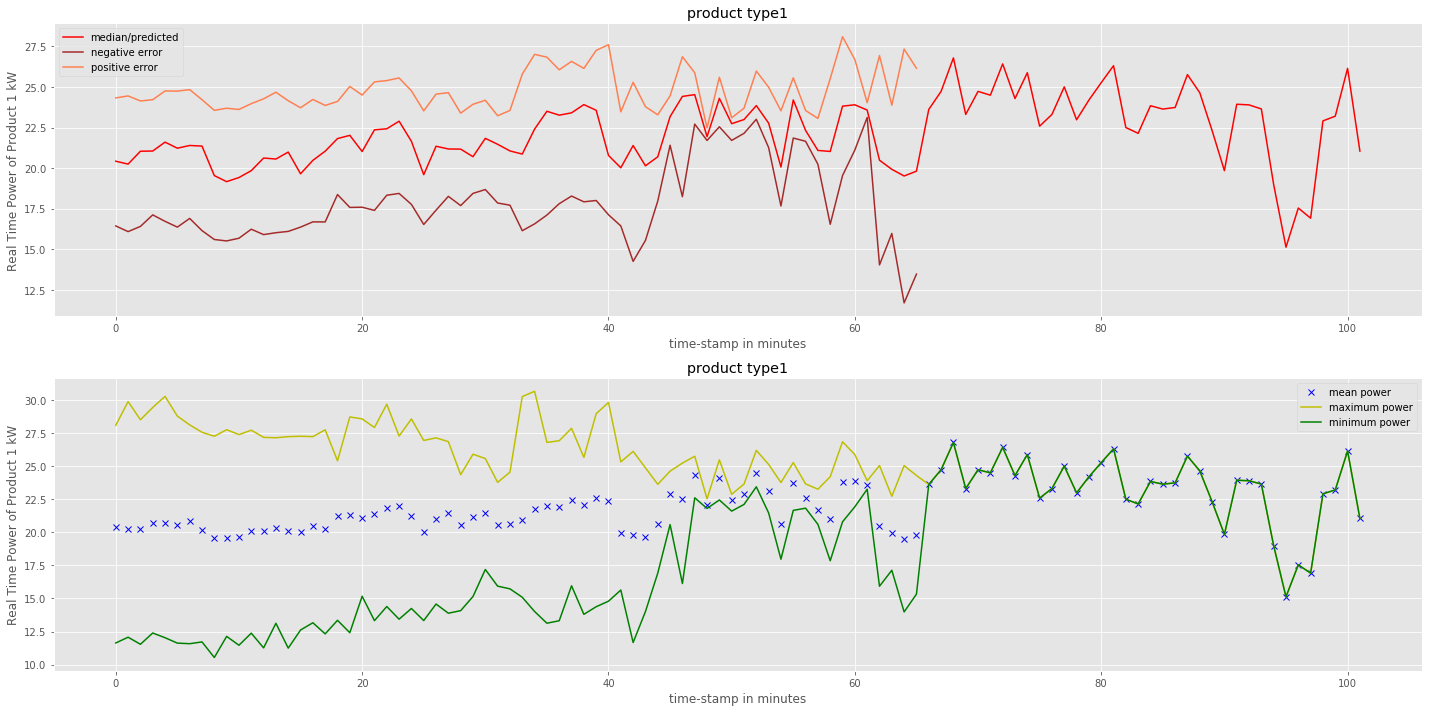

standard deviation is 3.68703065716


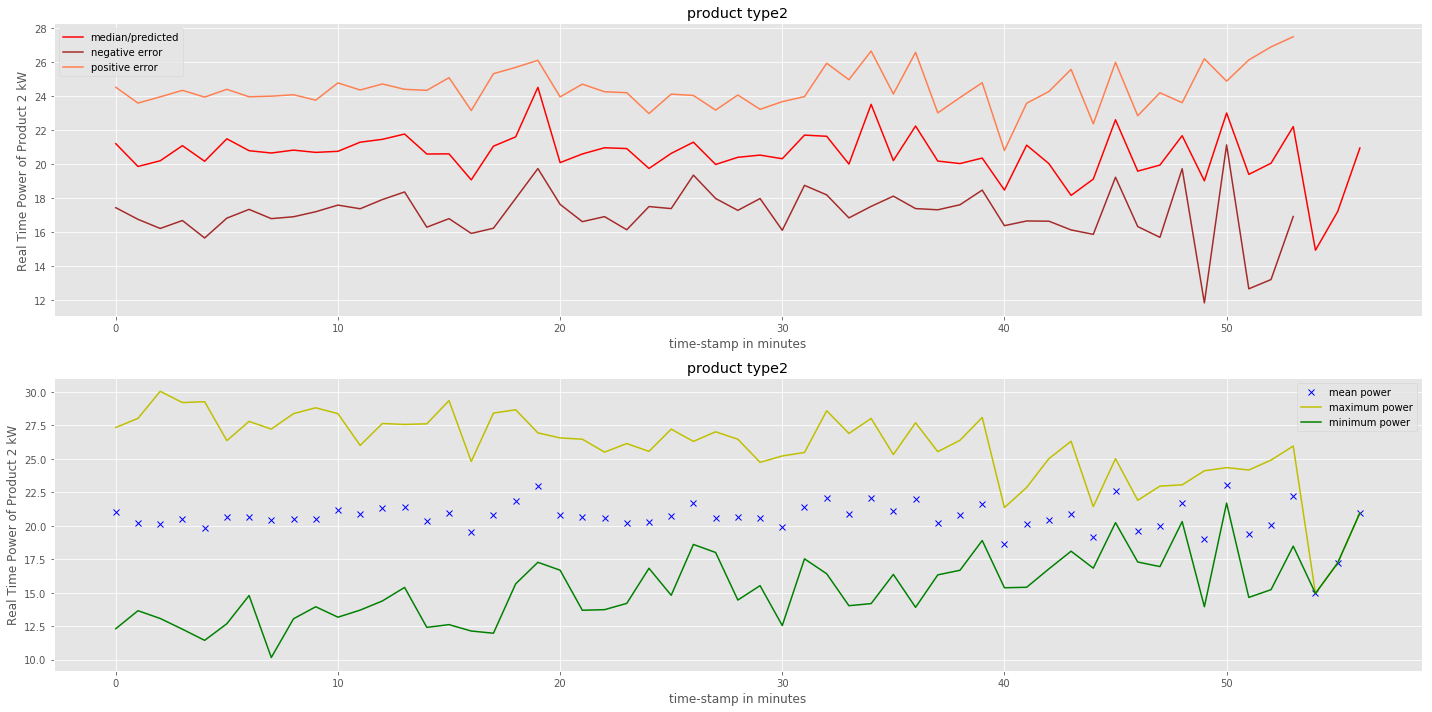

standard deviation is 3.74880587682


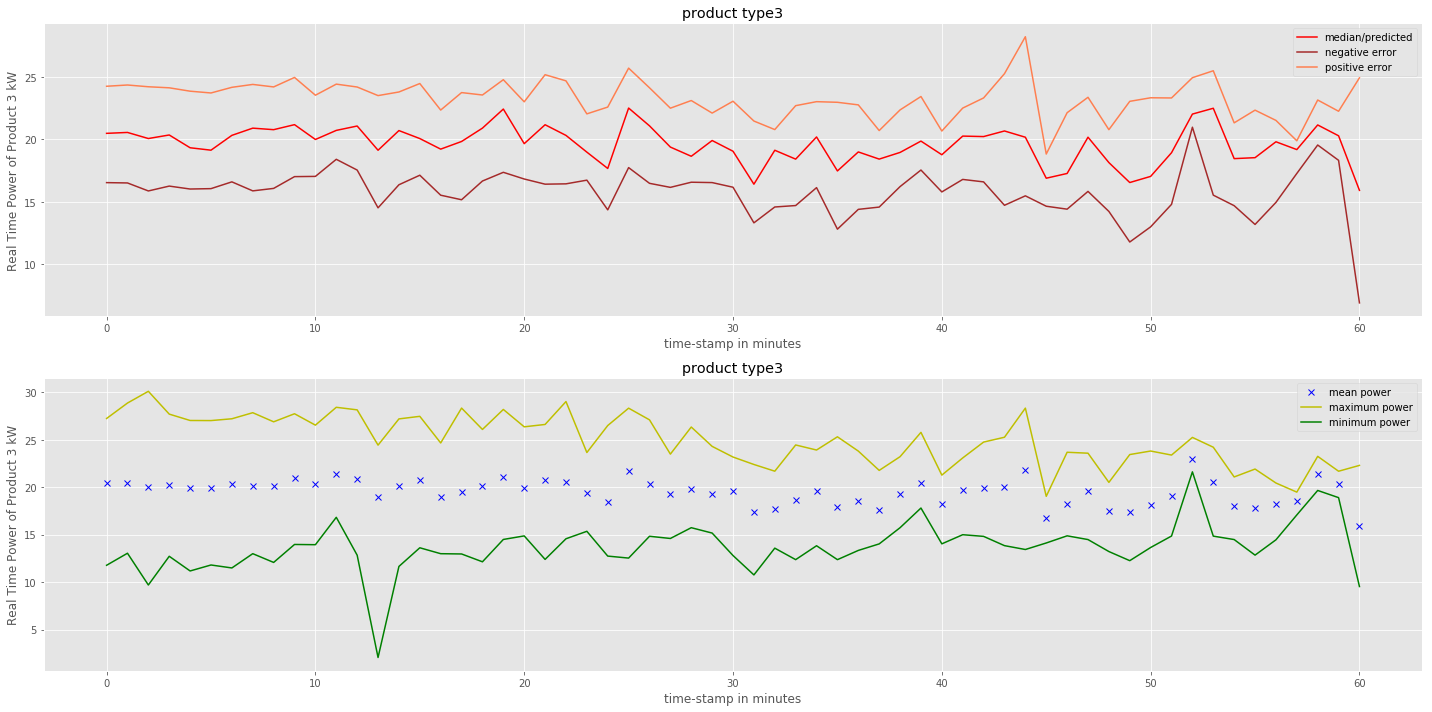

standard deviation is 3.03753382962


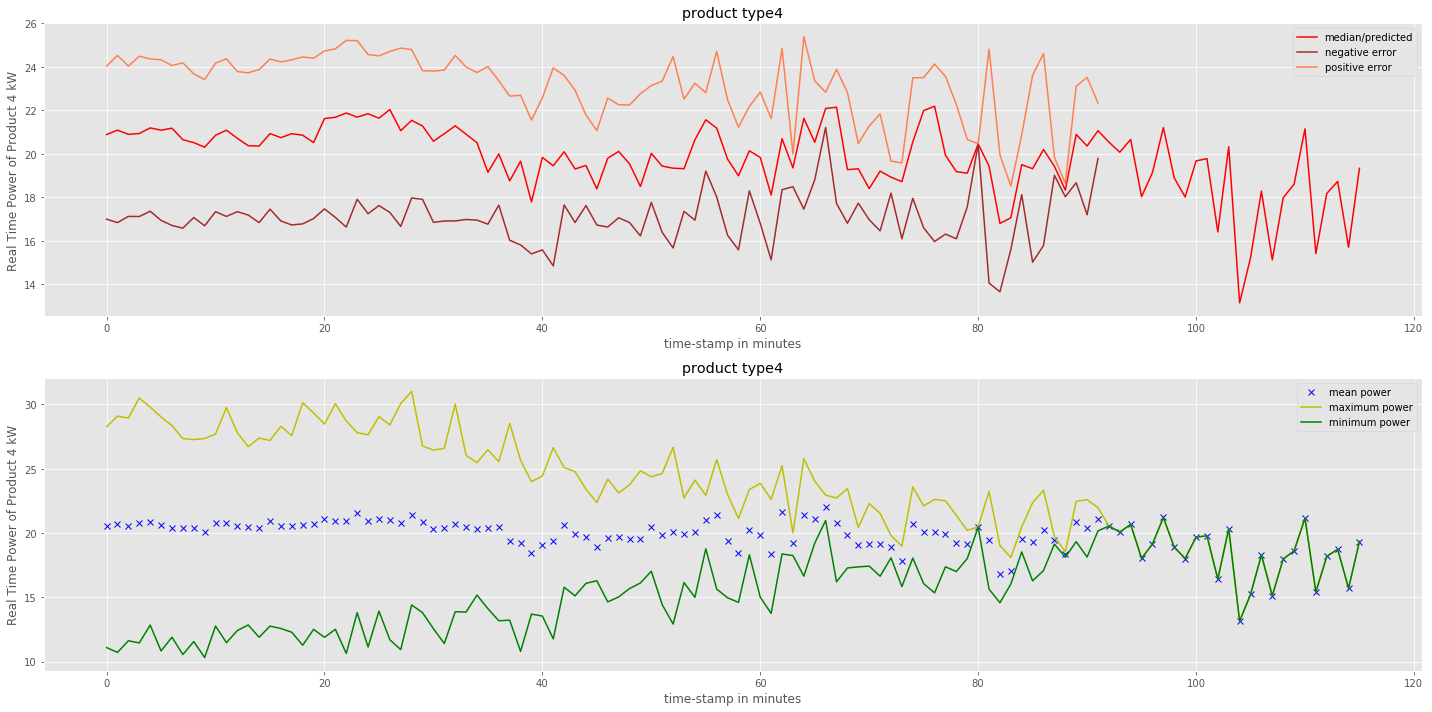

standard deviation is 3.5994465014


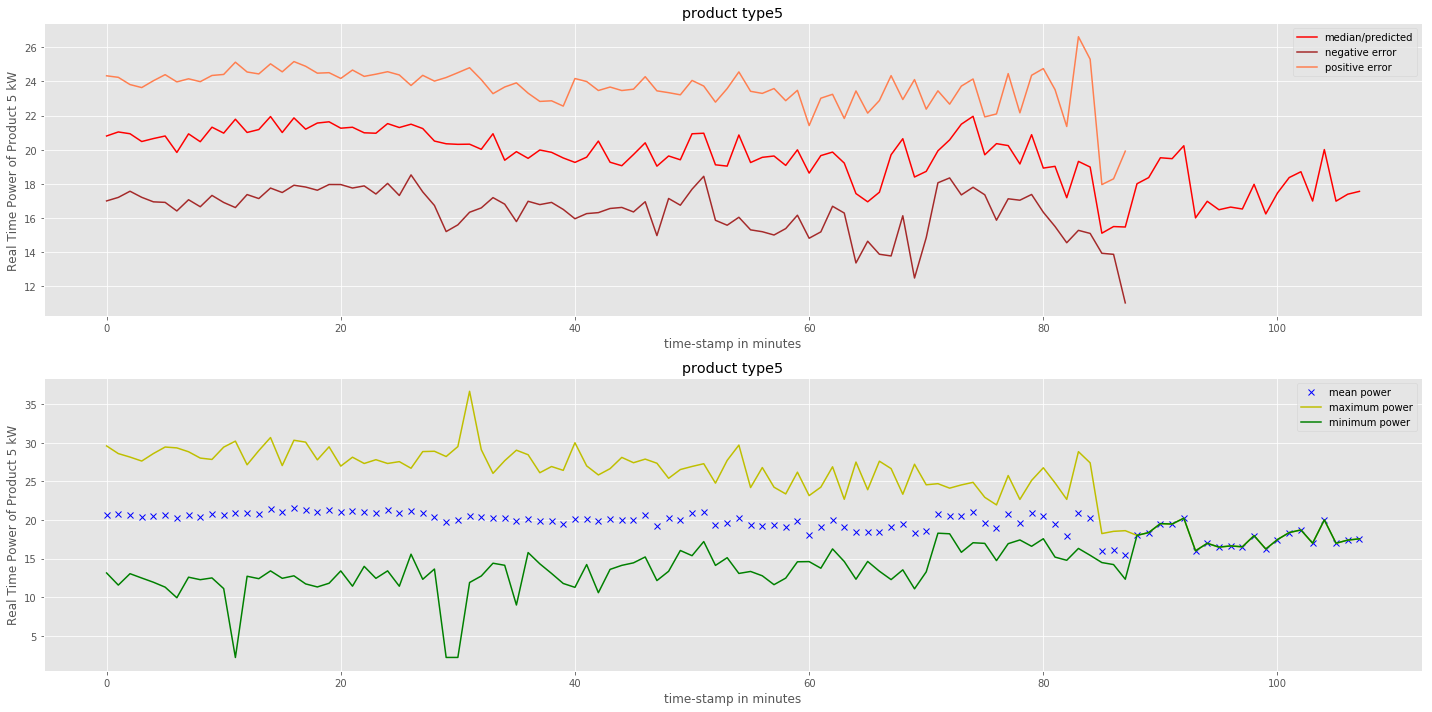

standard deviation is 3.7842768957


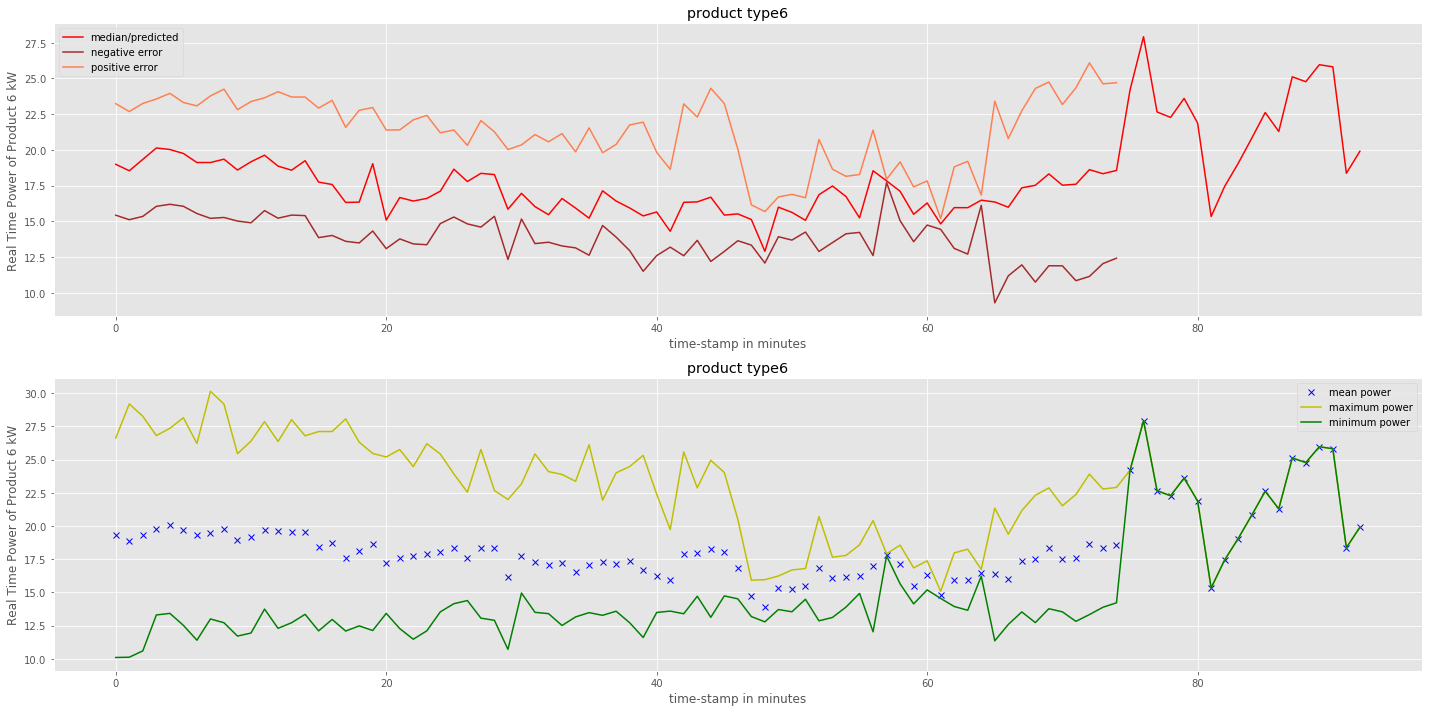

standard deviation is 3.76760705638


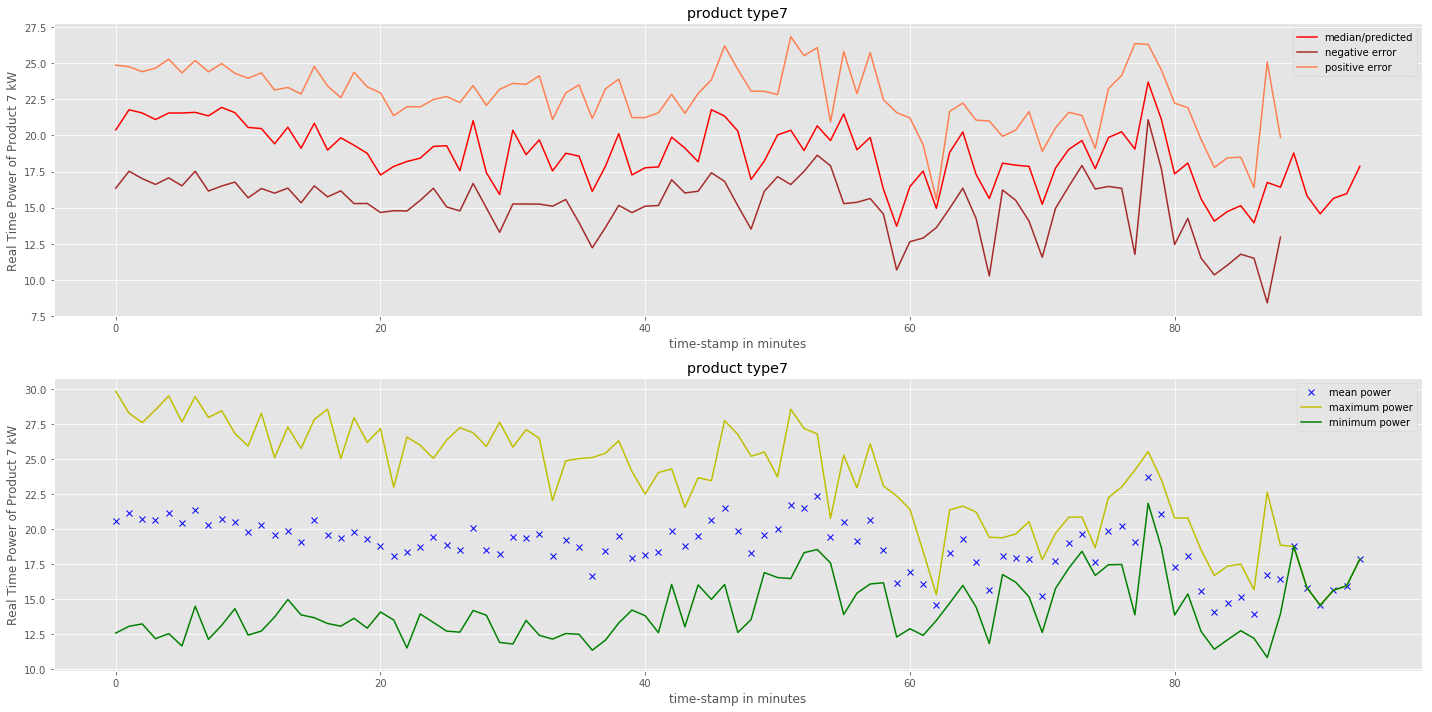

standard deviation is 3.93105038429


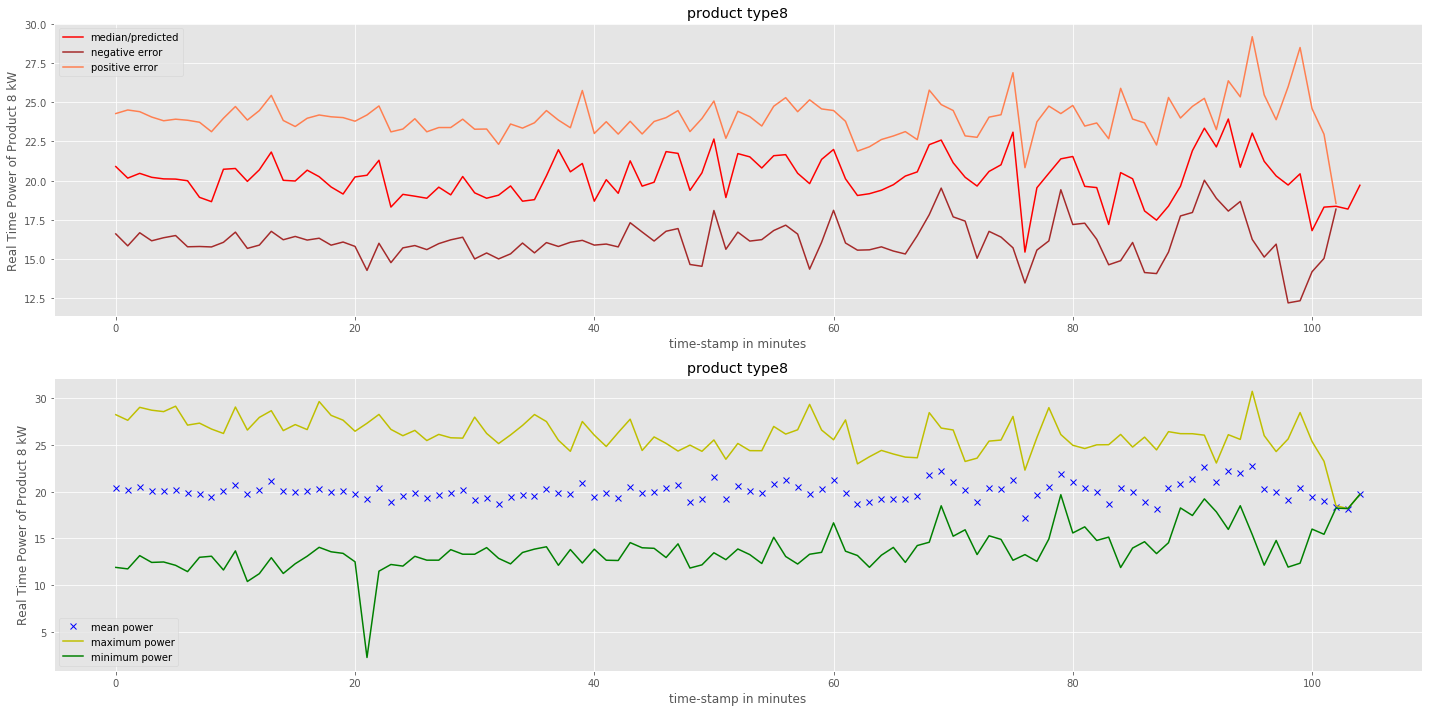

standard deviation is 2.94690317458


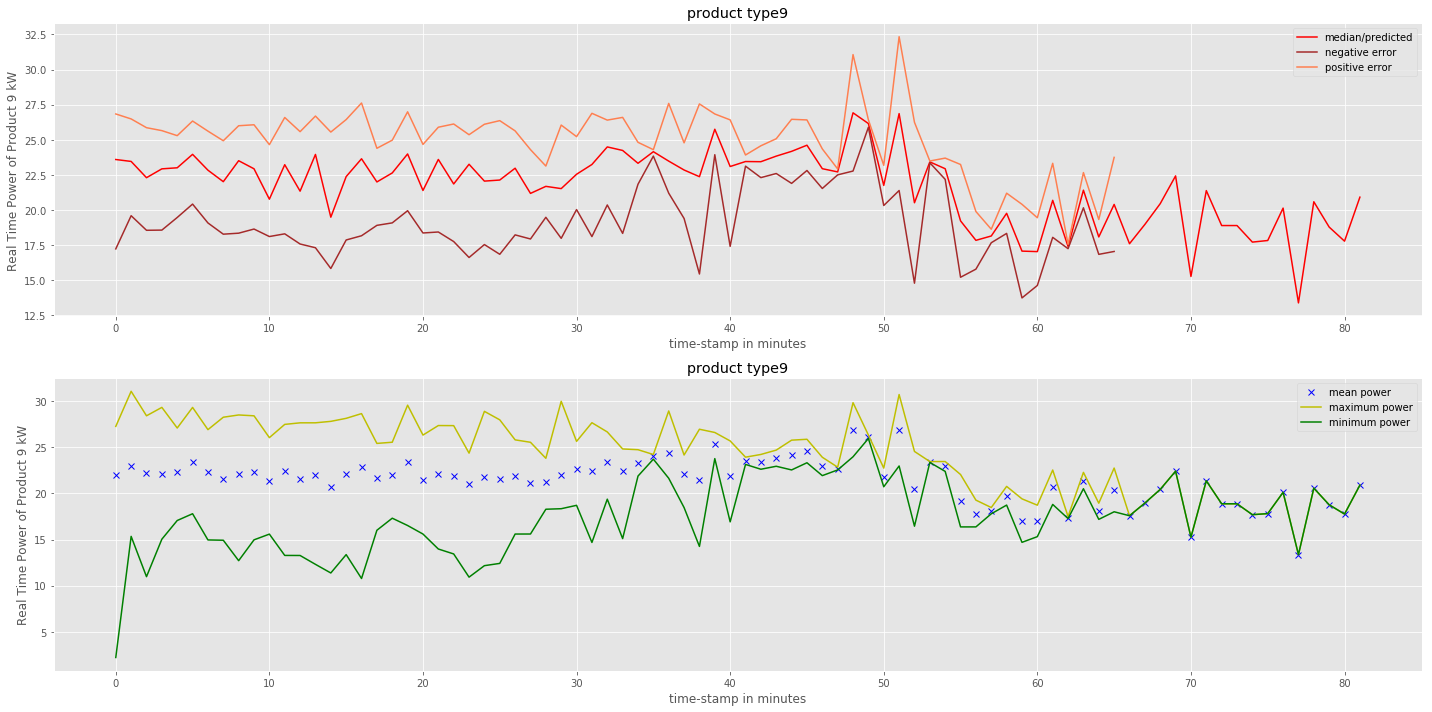

standard deviation is 3.46660737528


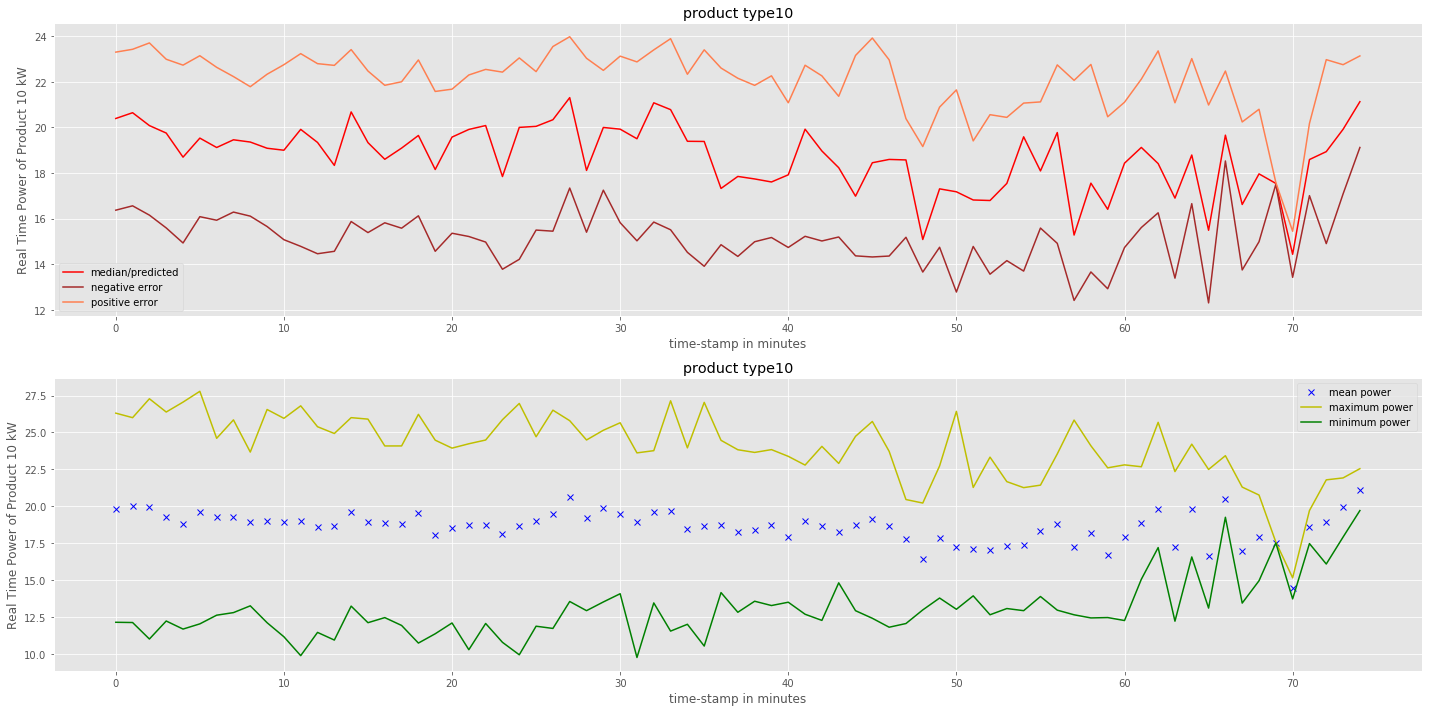

standard deviation is 3.86932682109


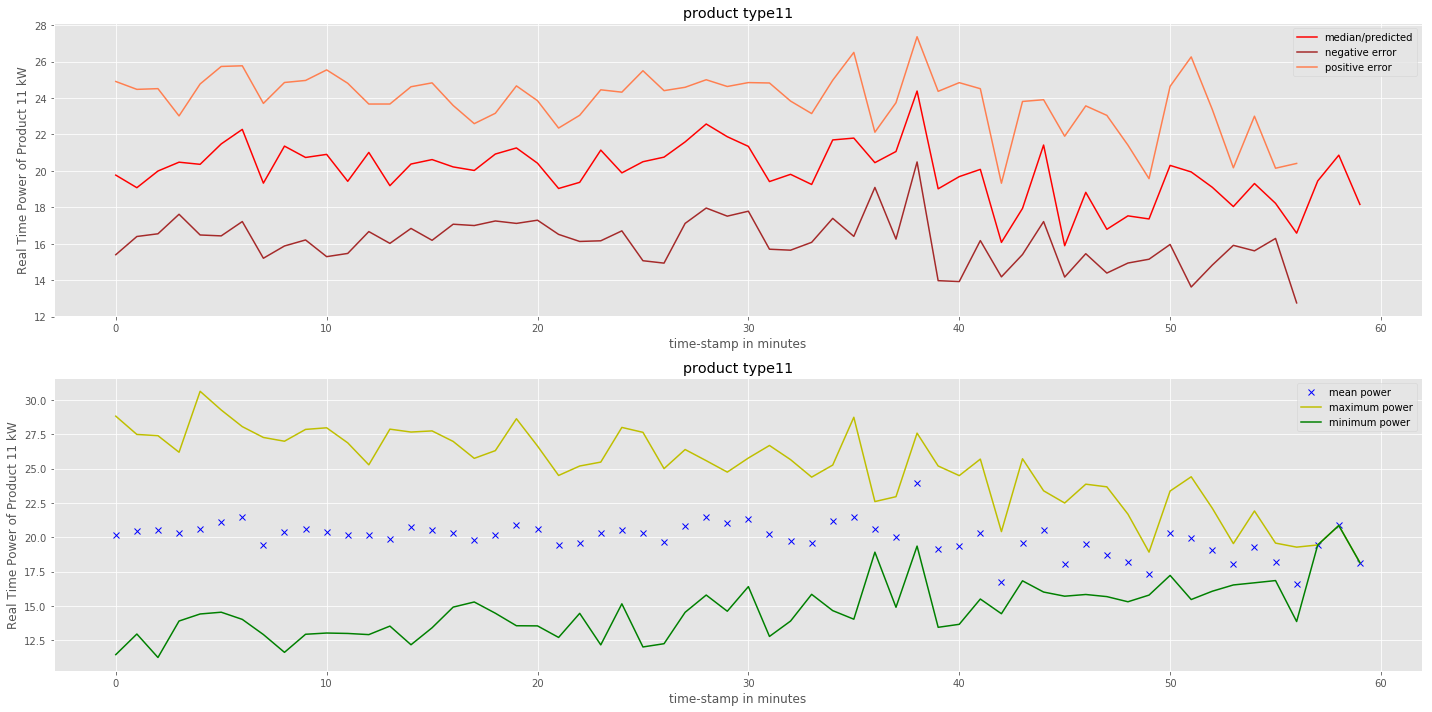

standard deviation is 3.19571440861


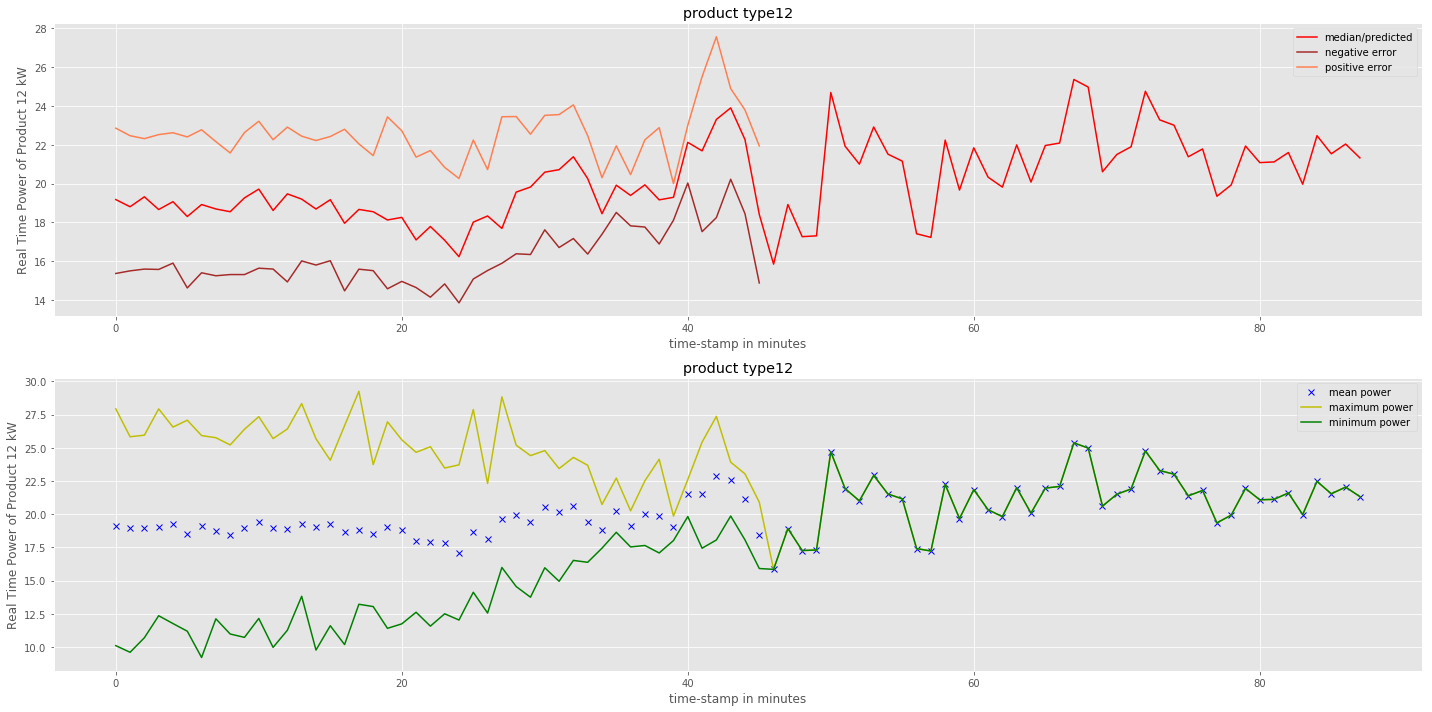

standard deviation is 3.21471392671


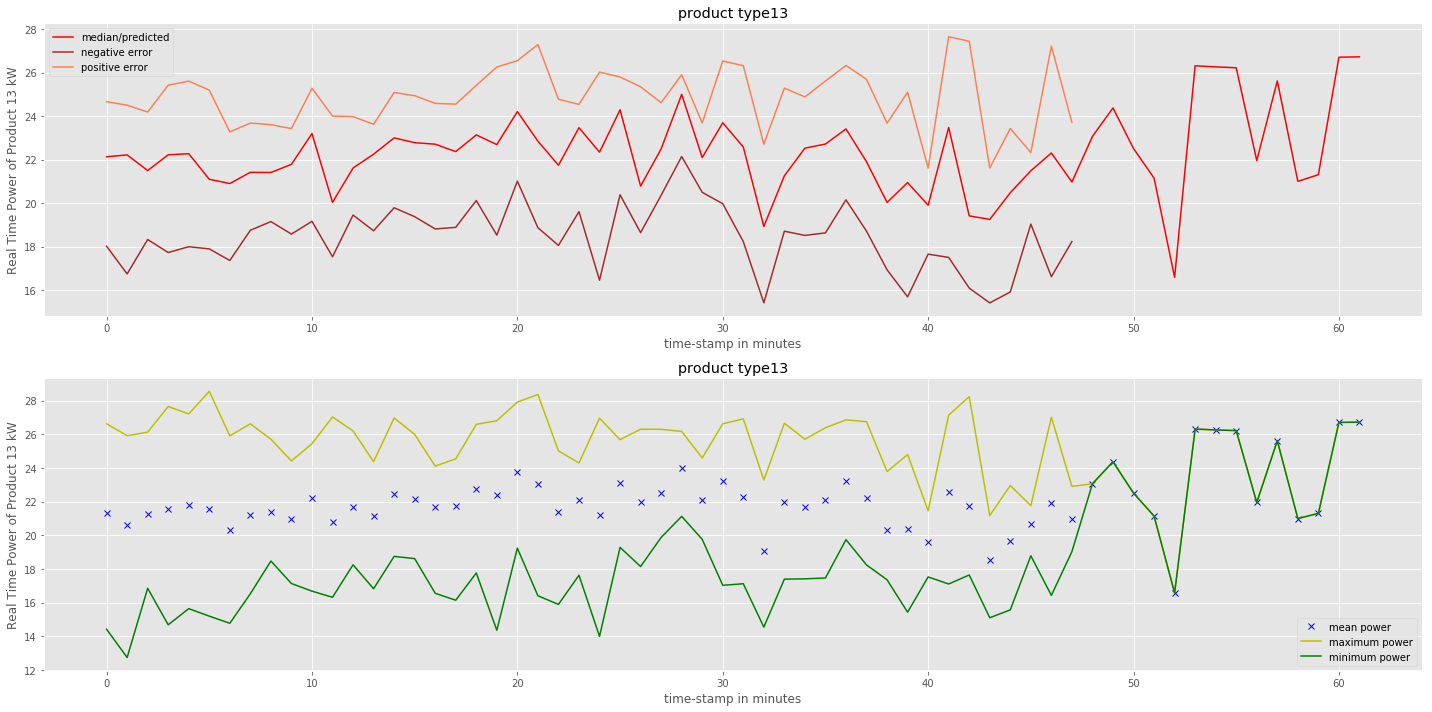

standard deviation is 3.41499956132


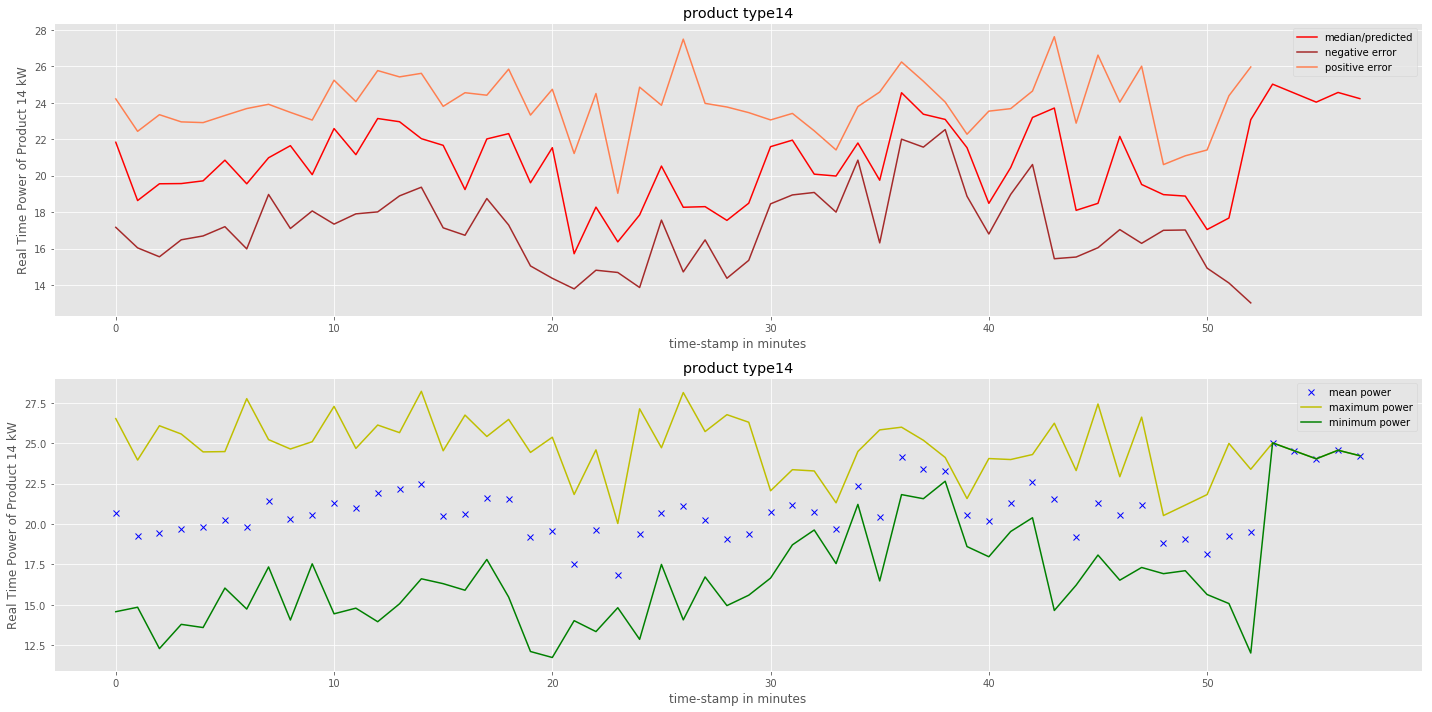

standard deviation is 2.73417698283


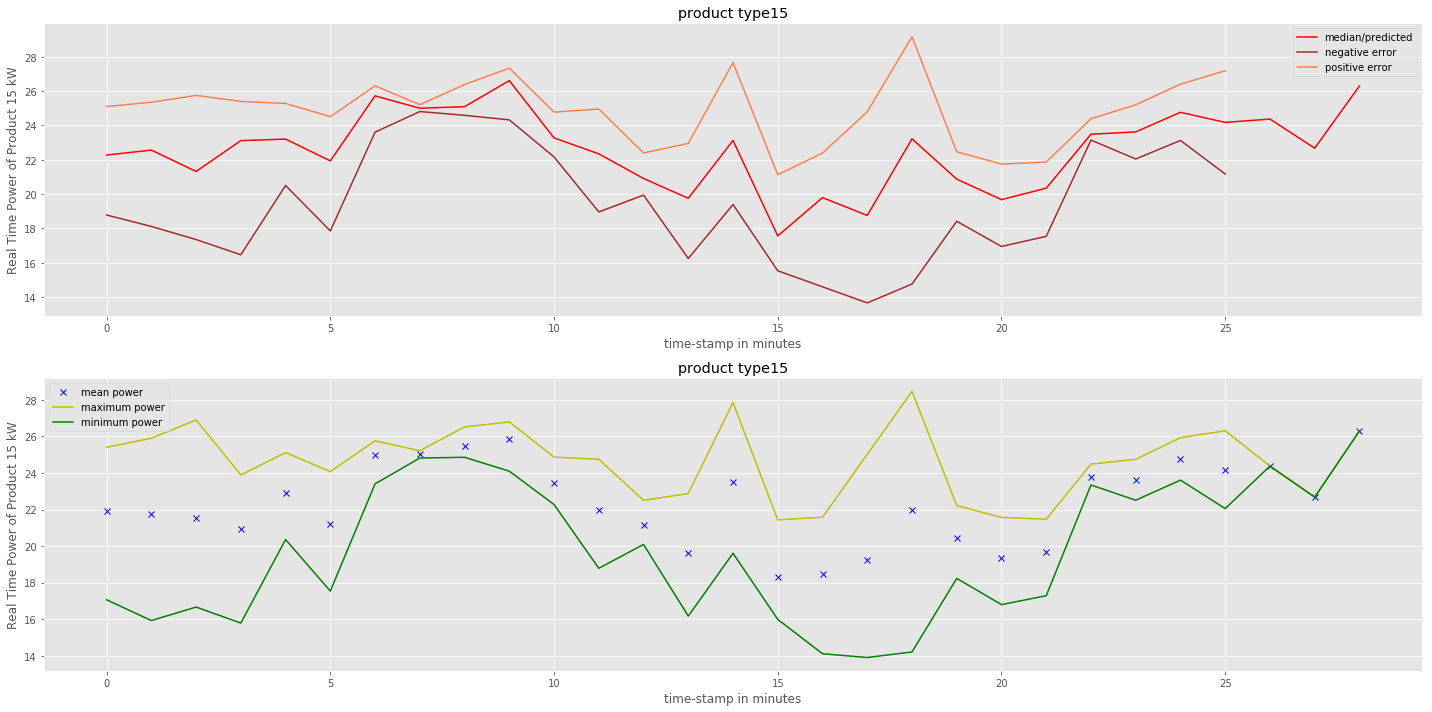

standard deviation is 3.8423087534


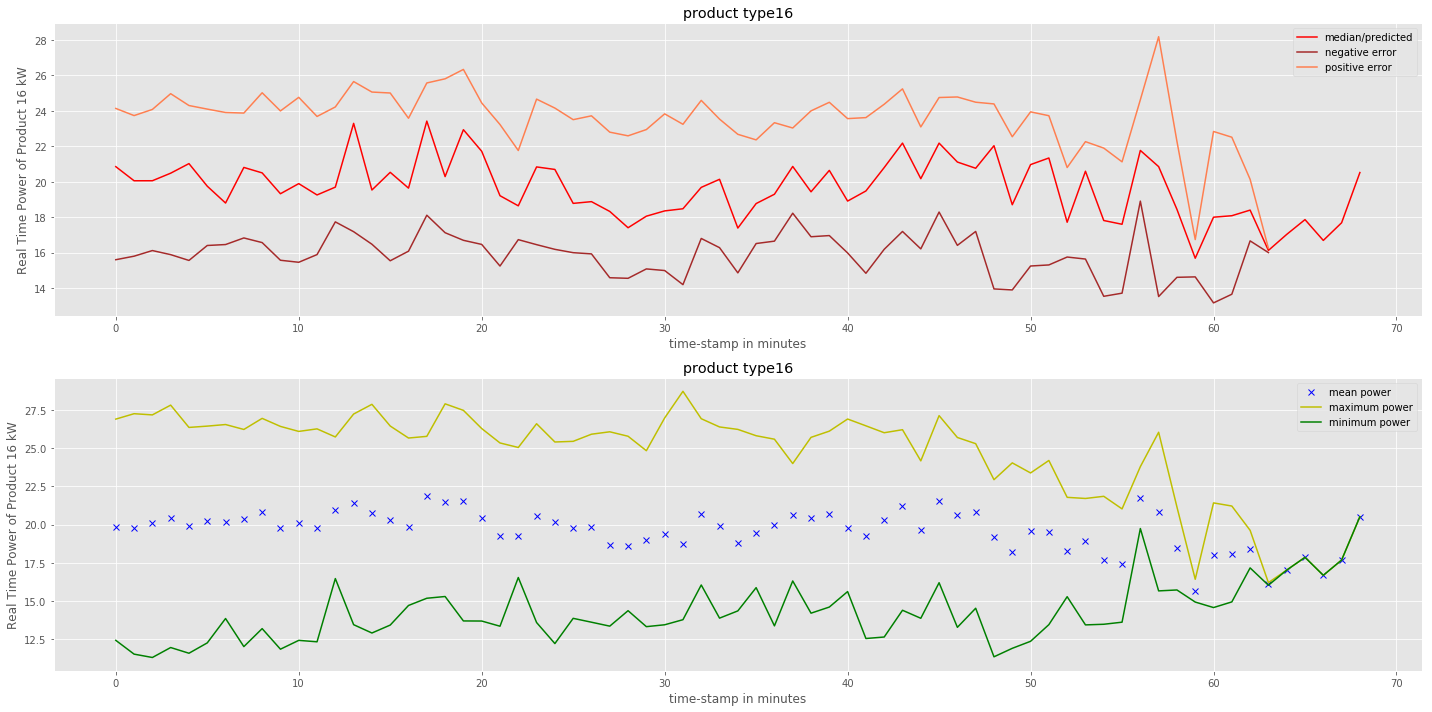

standard deviation is 3.74496777538


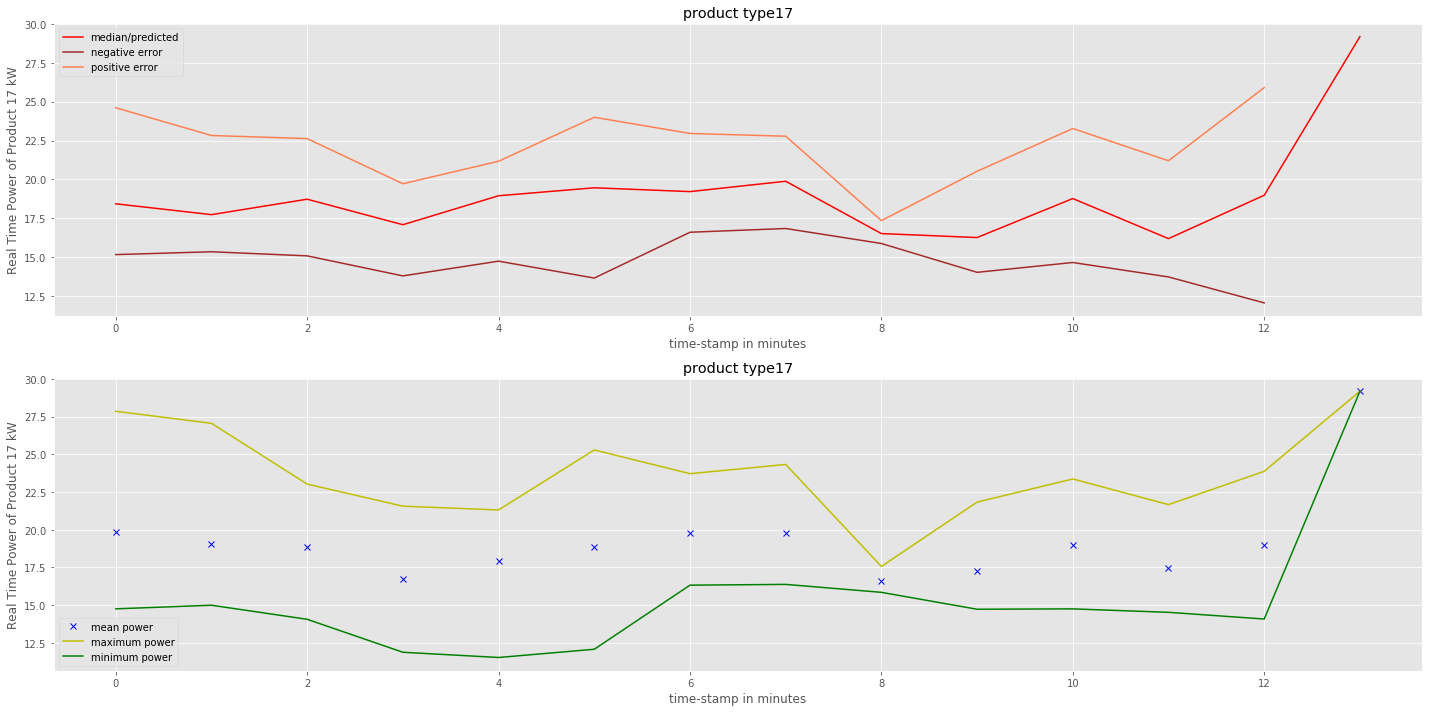

standard deviation is 3.61773649728


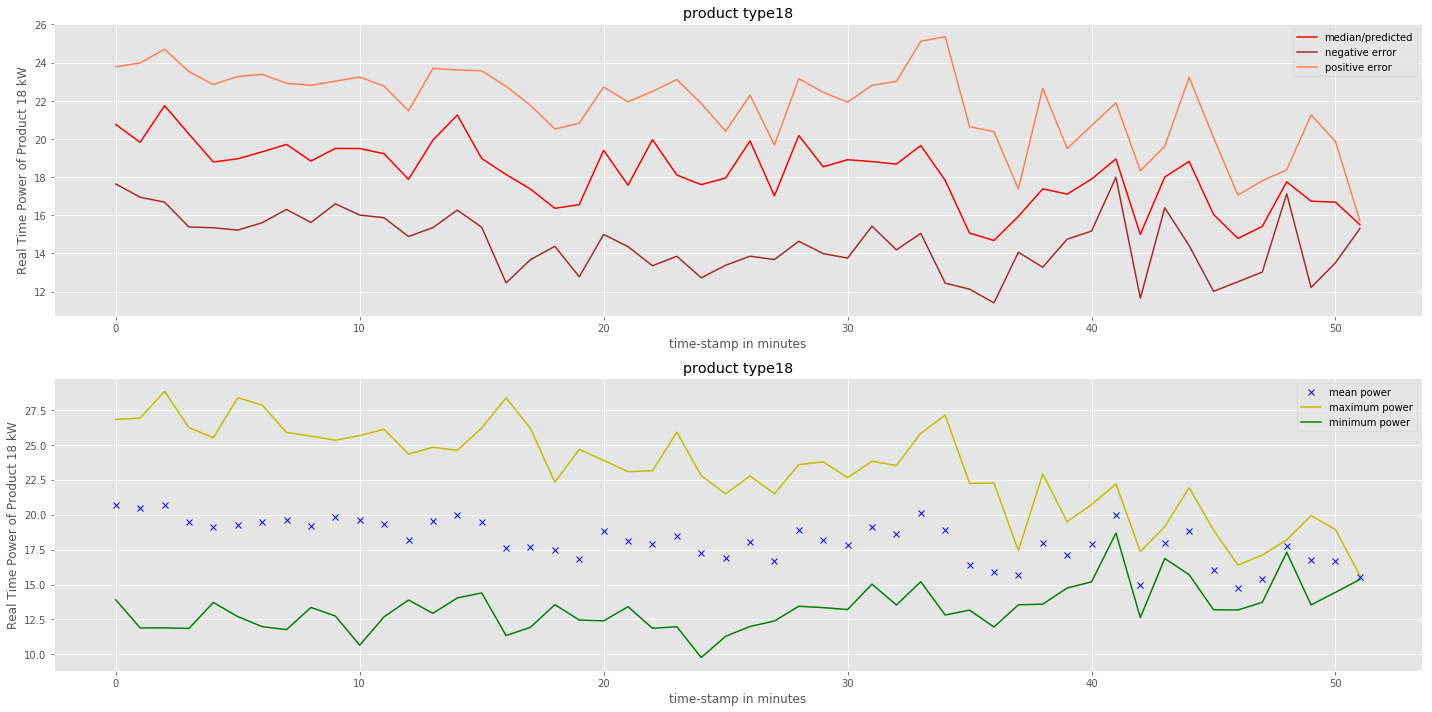

standard deviation is 3.99828831384


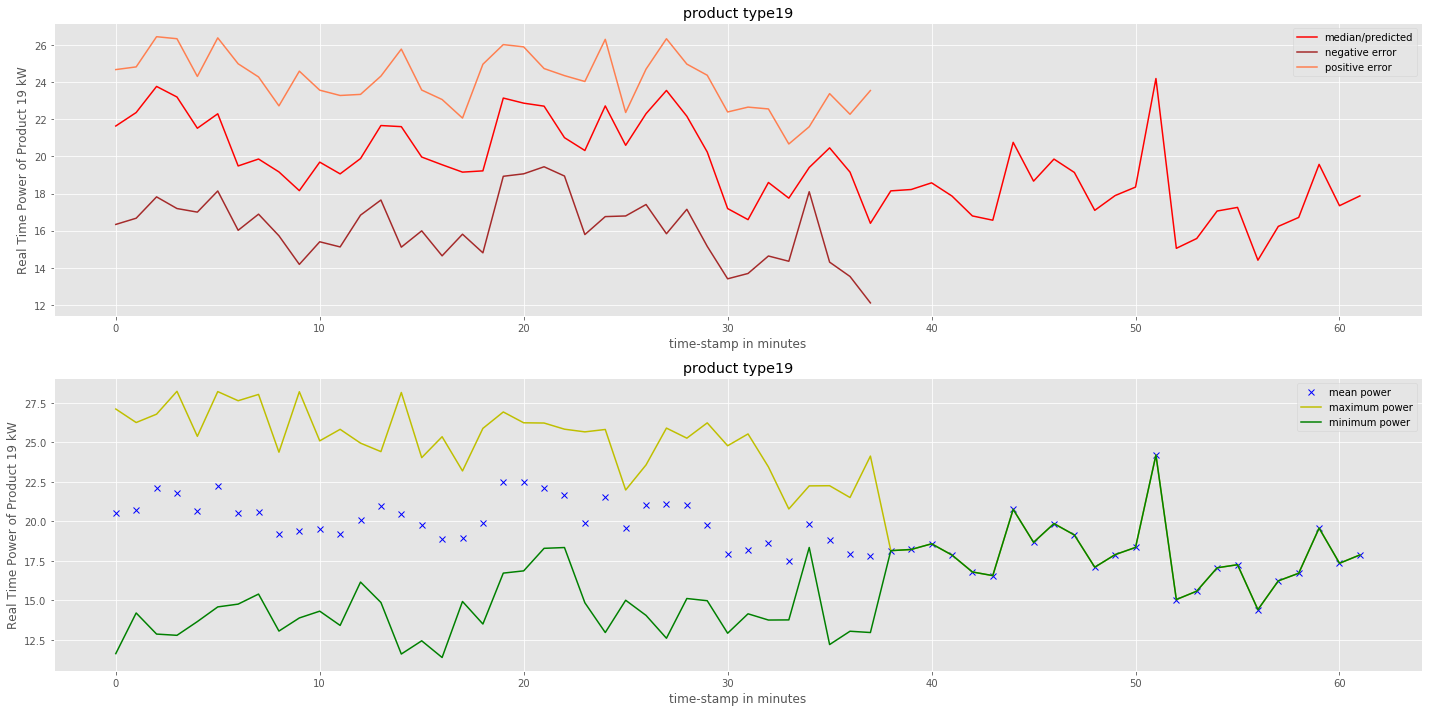

standard deviation is 2.97462522947


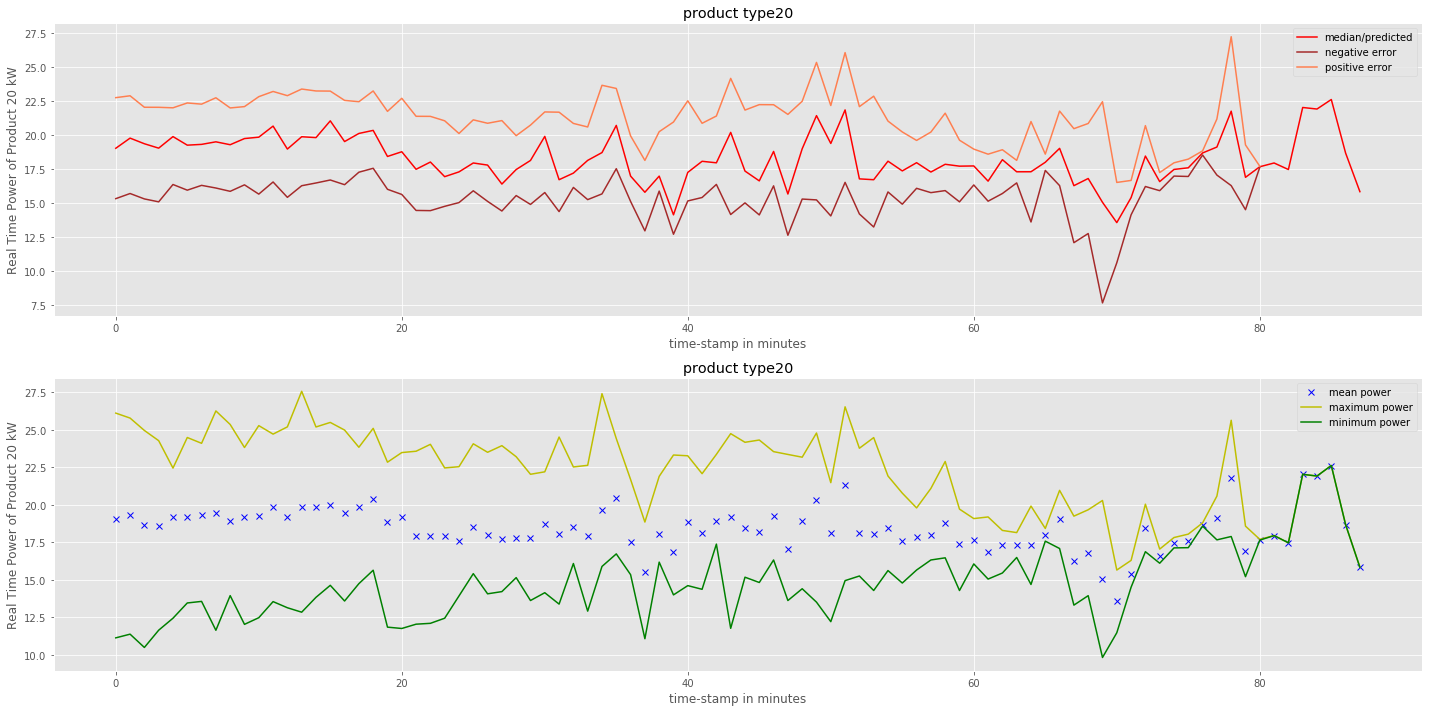

standard deviation is 3.51180720468


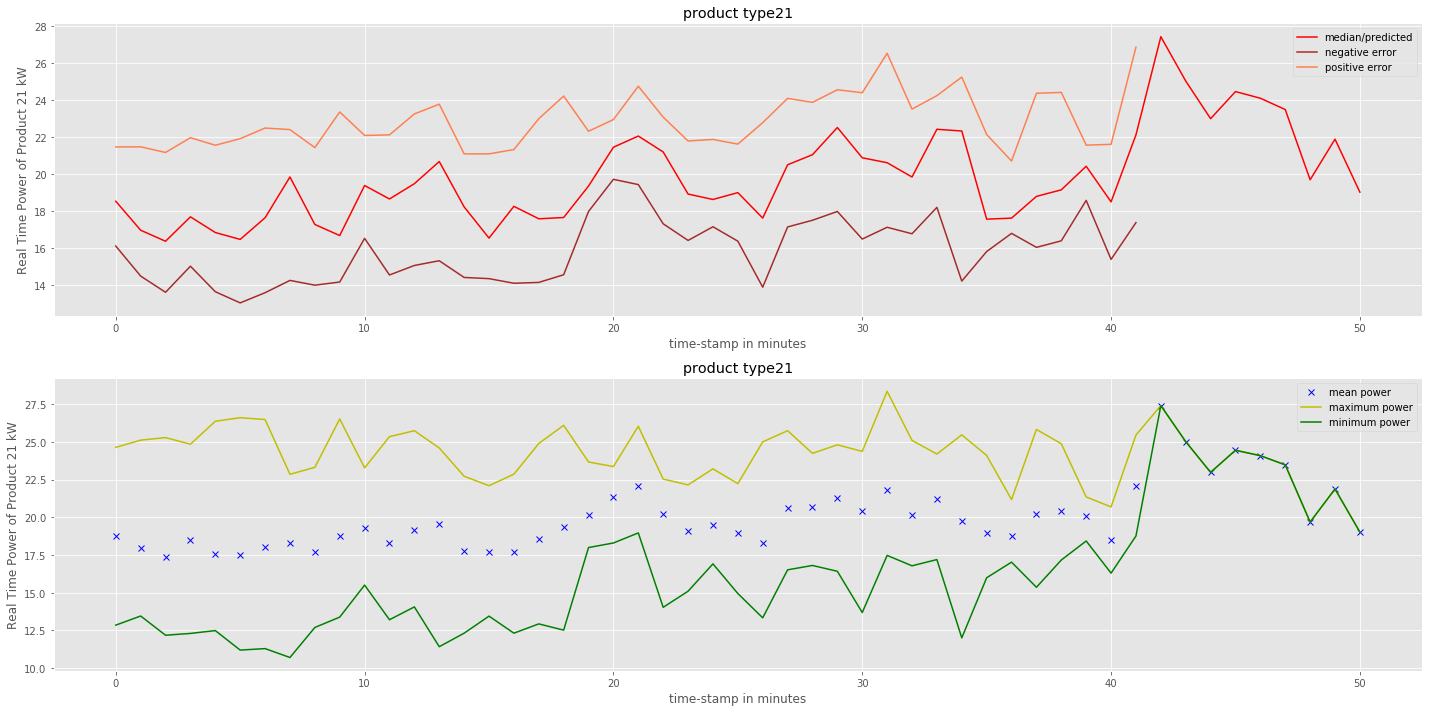

standard deviation is 3.53286277084


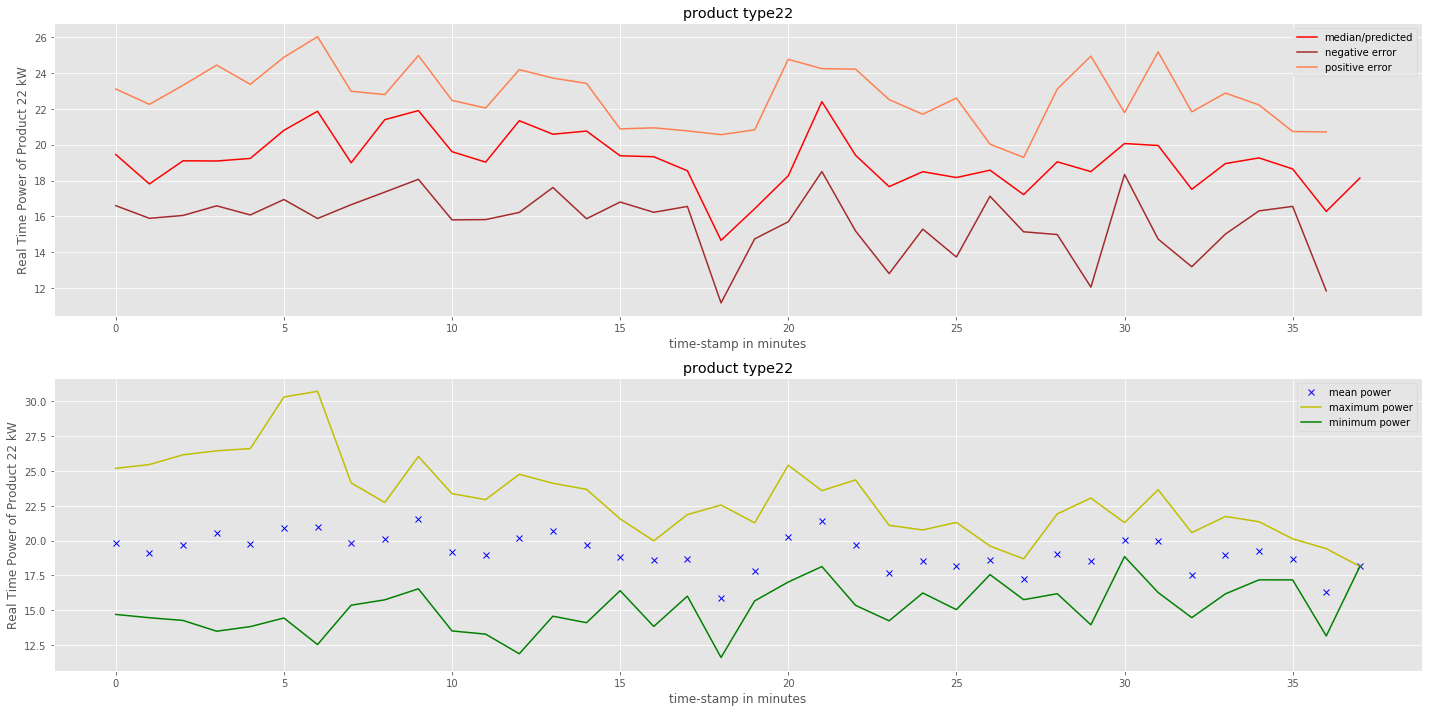

standard deviation is 3.8769922273


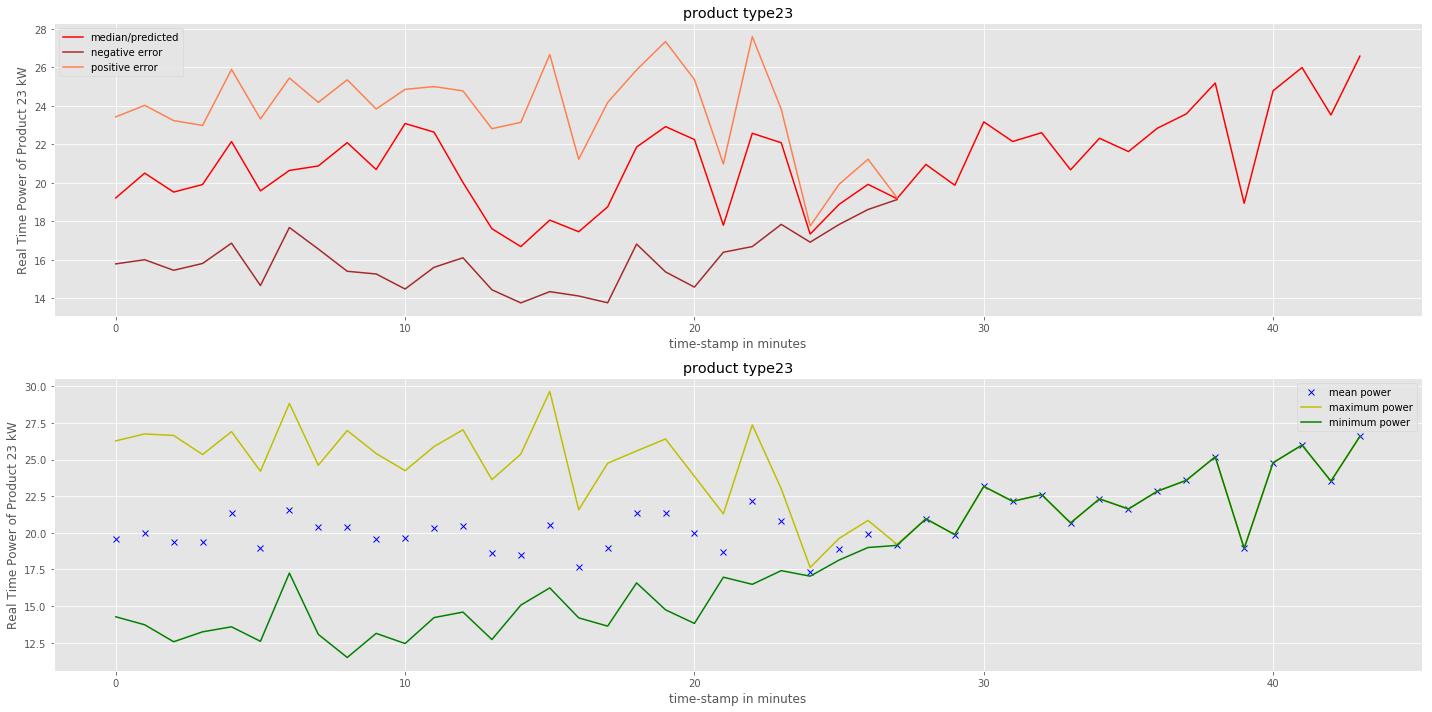

standard deviation is 3.01843345583


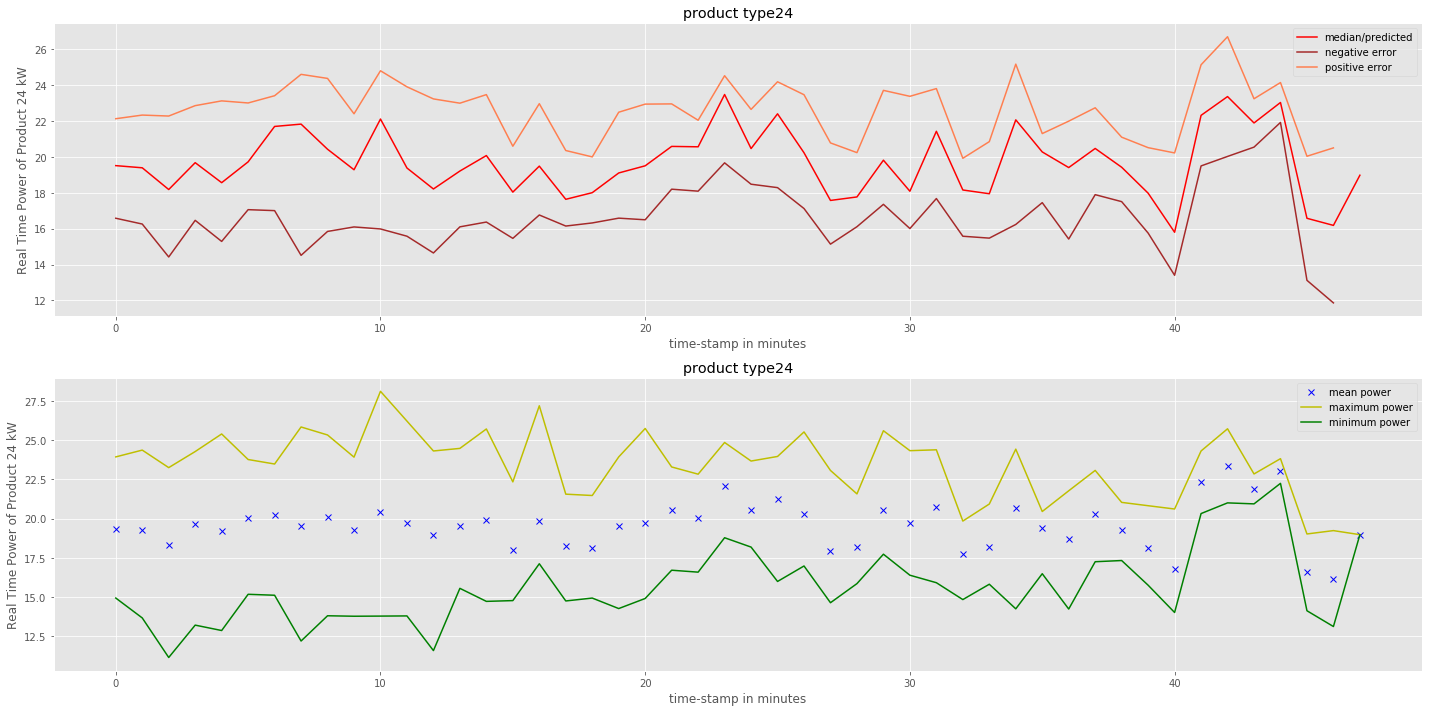

standard deviation is 3.55200832146


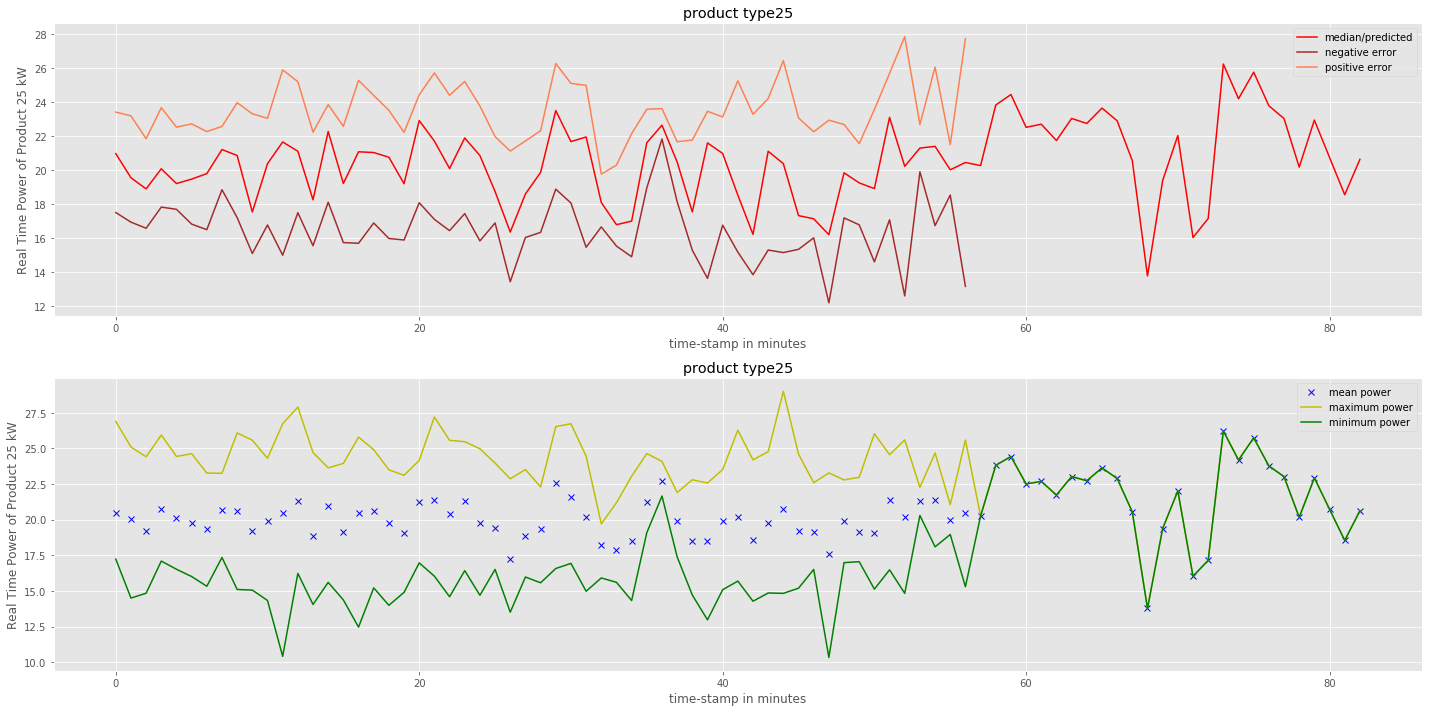

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


standard deviation is nan


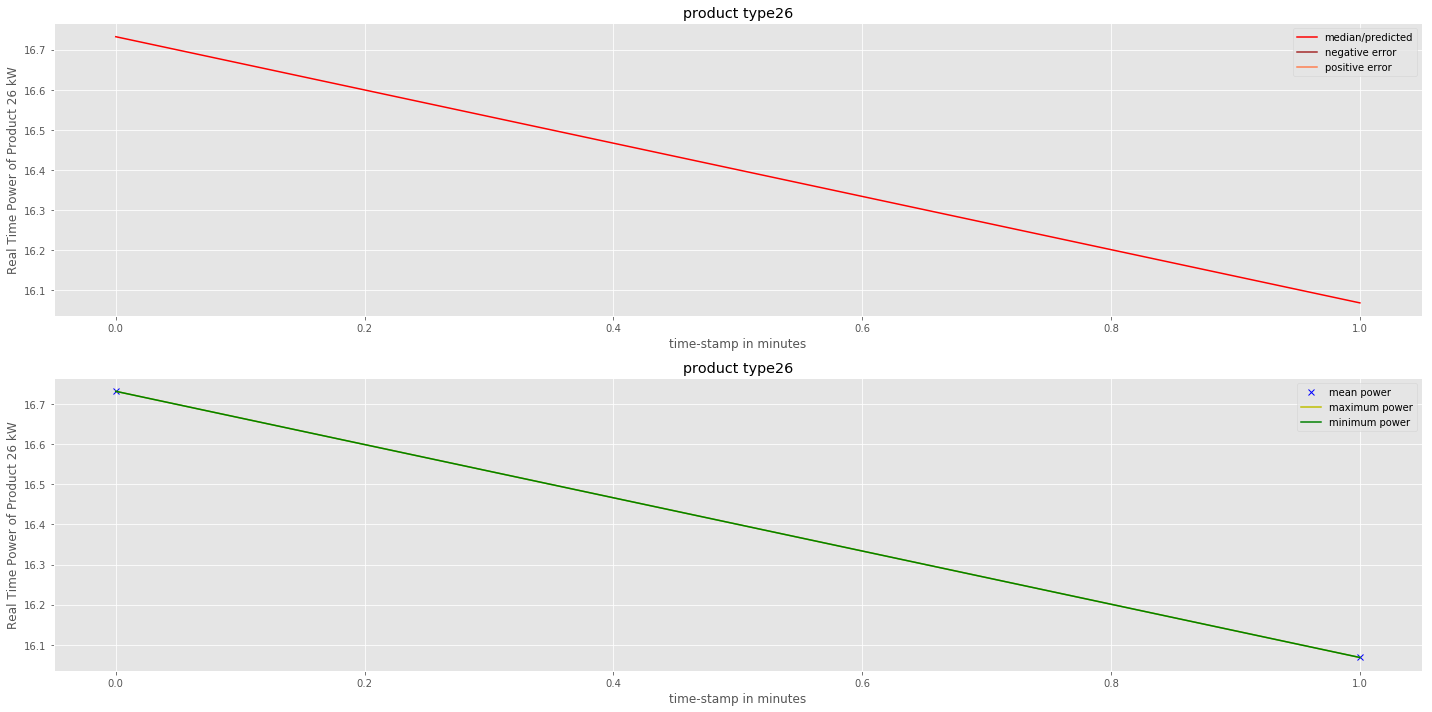

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


standard deviation is nan


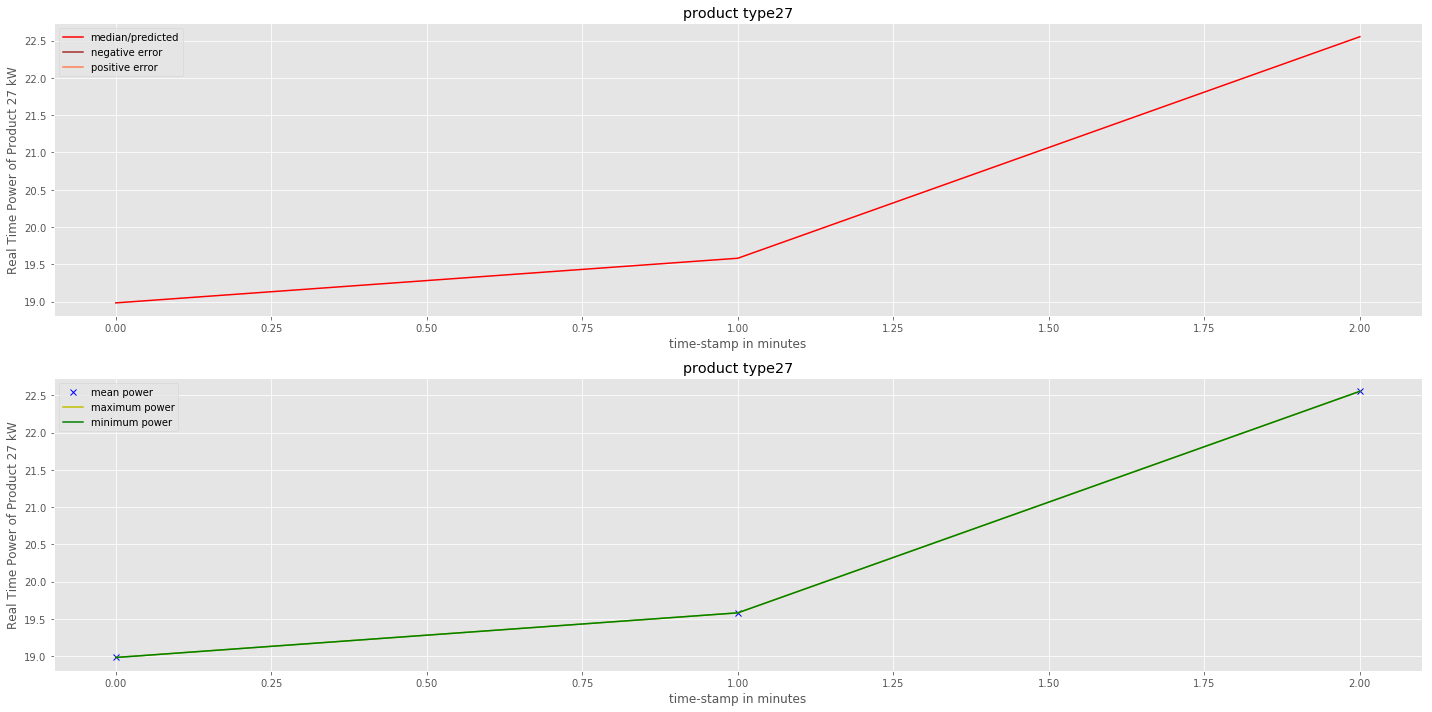

standard deviation is 3.59222072684


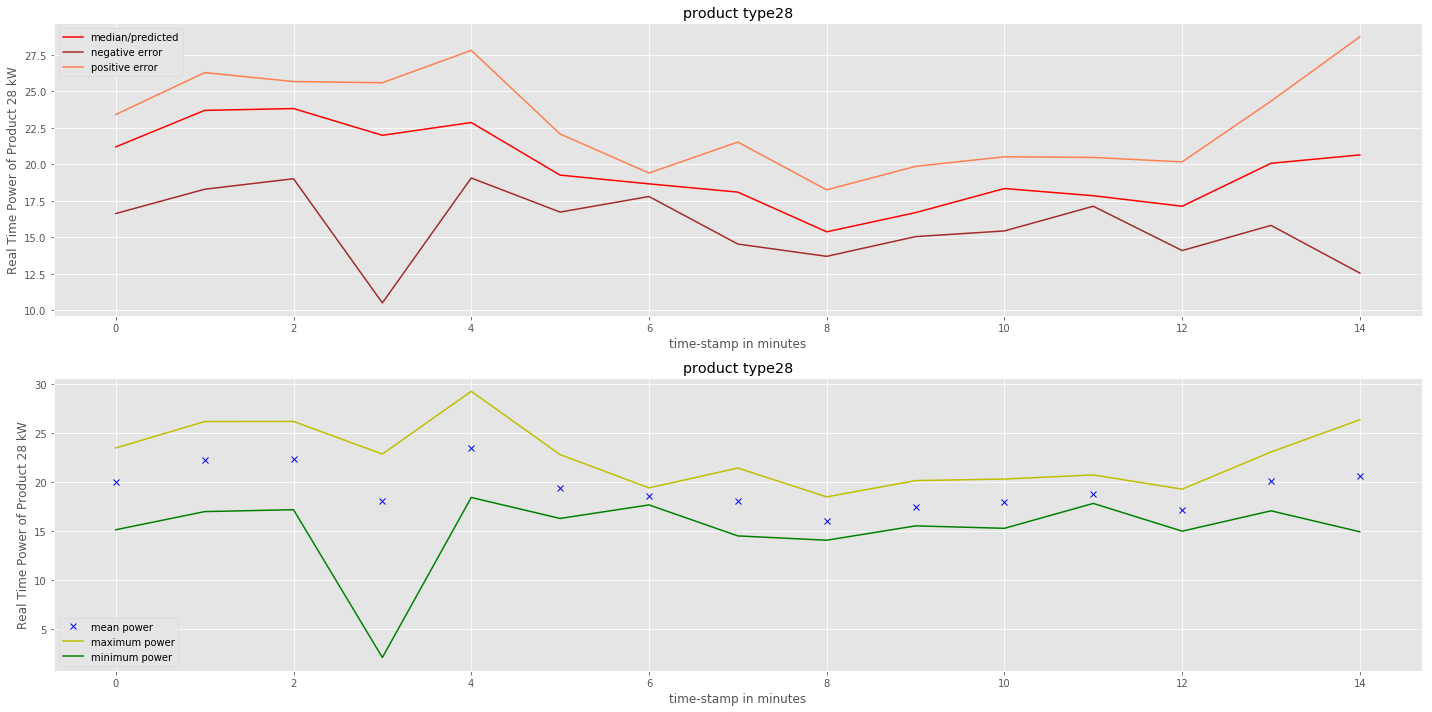

standard deviation is 3.21508449045


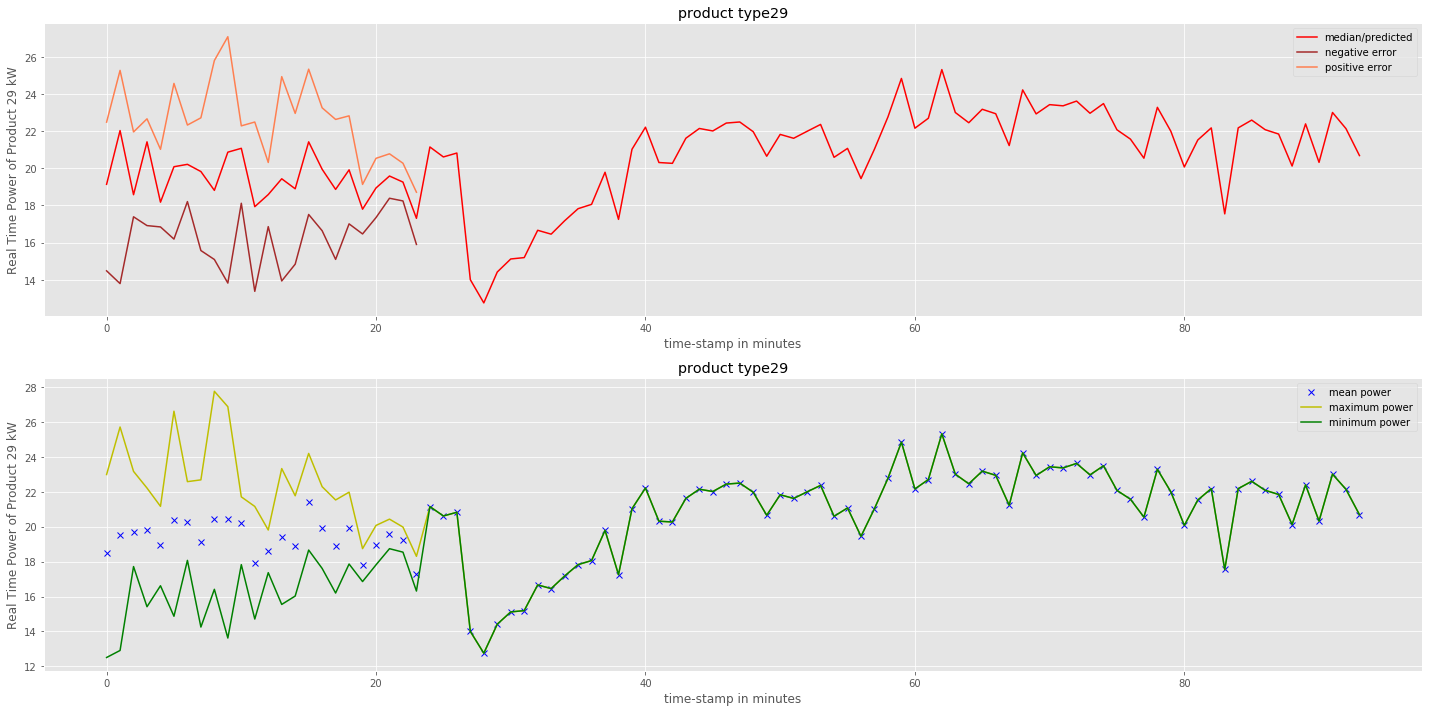

standard deviation is 2.43887891229


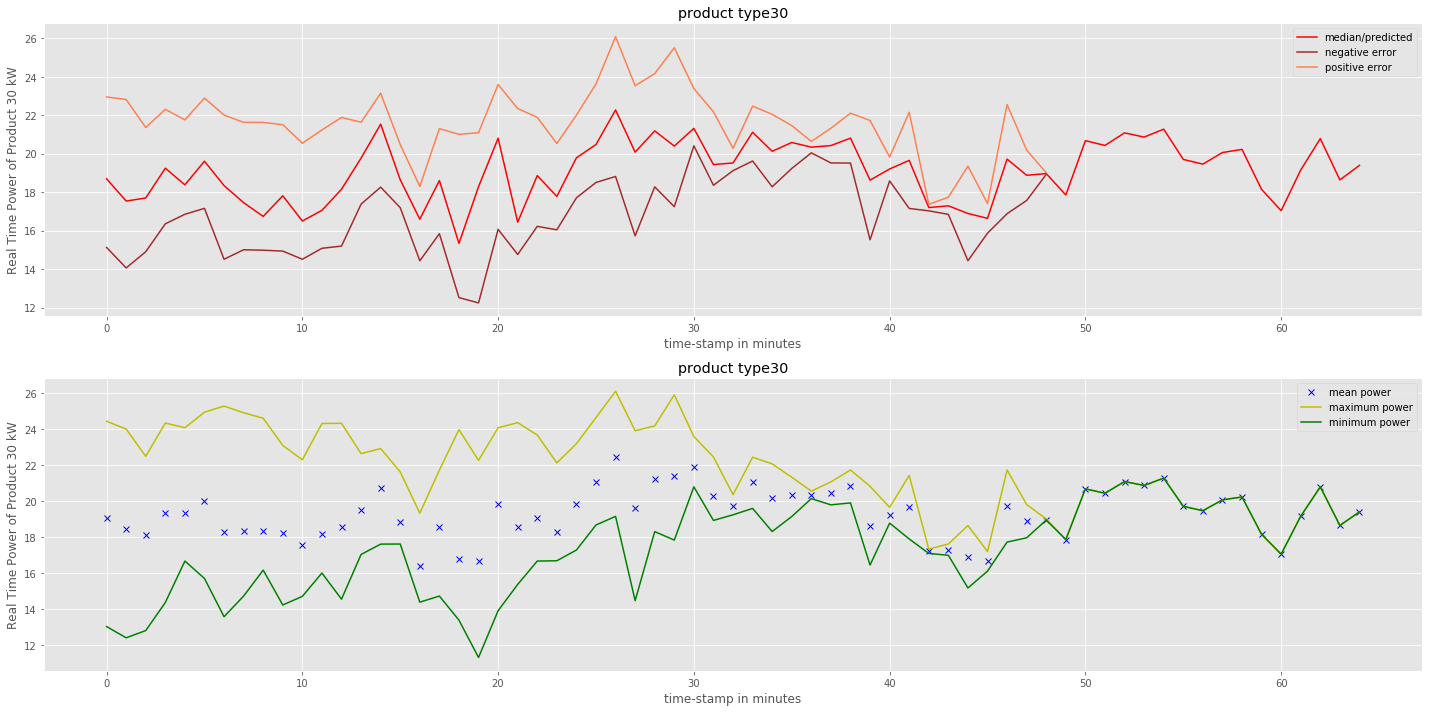

standard deviation is 2.84117539626


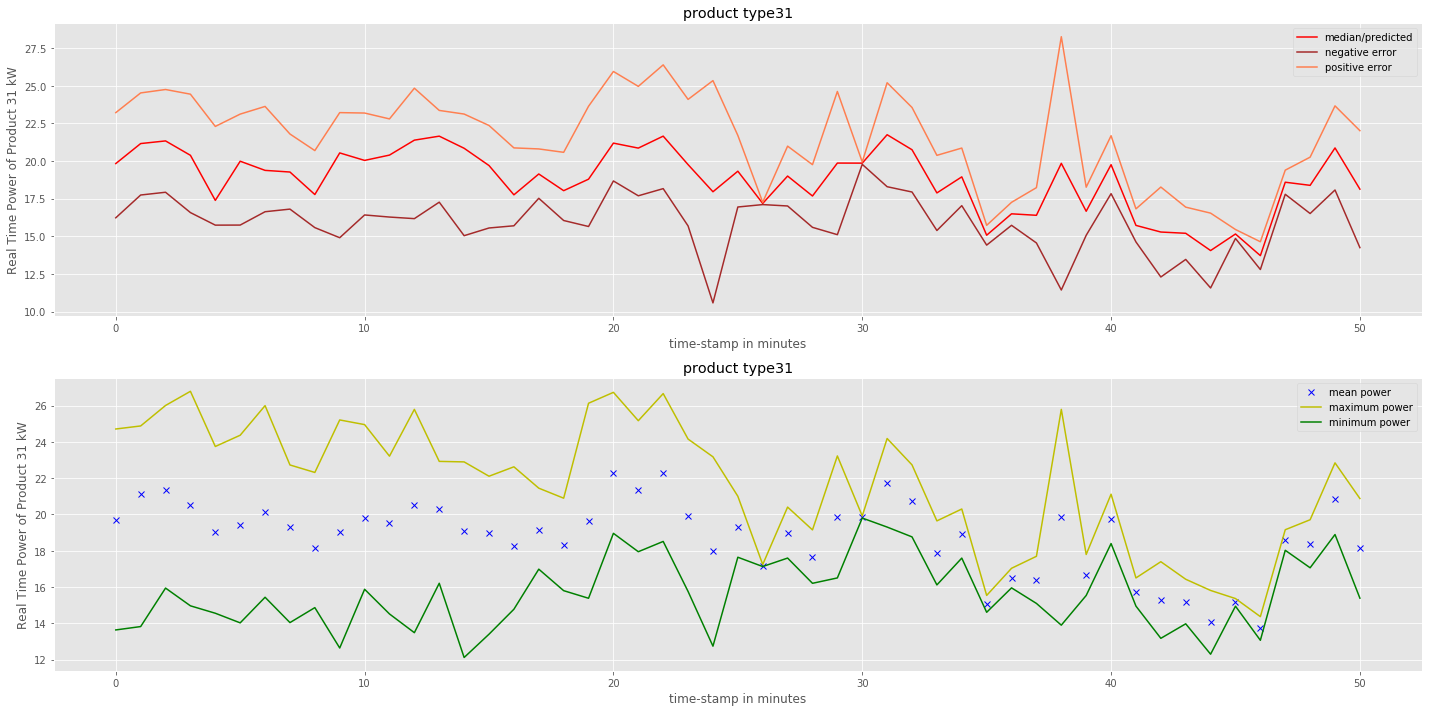

standard deviation is 4.15791921042


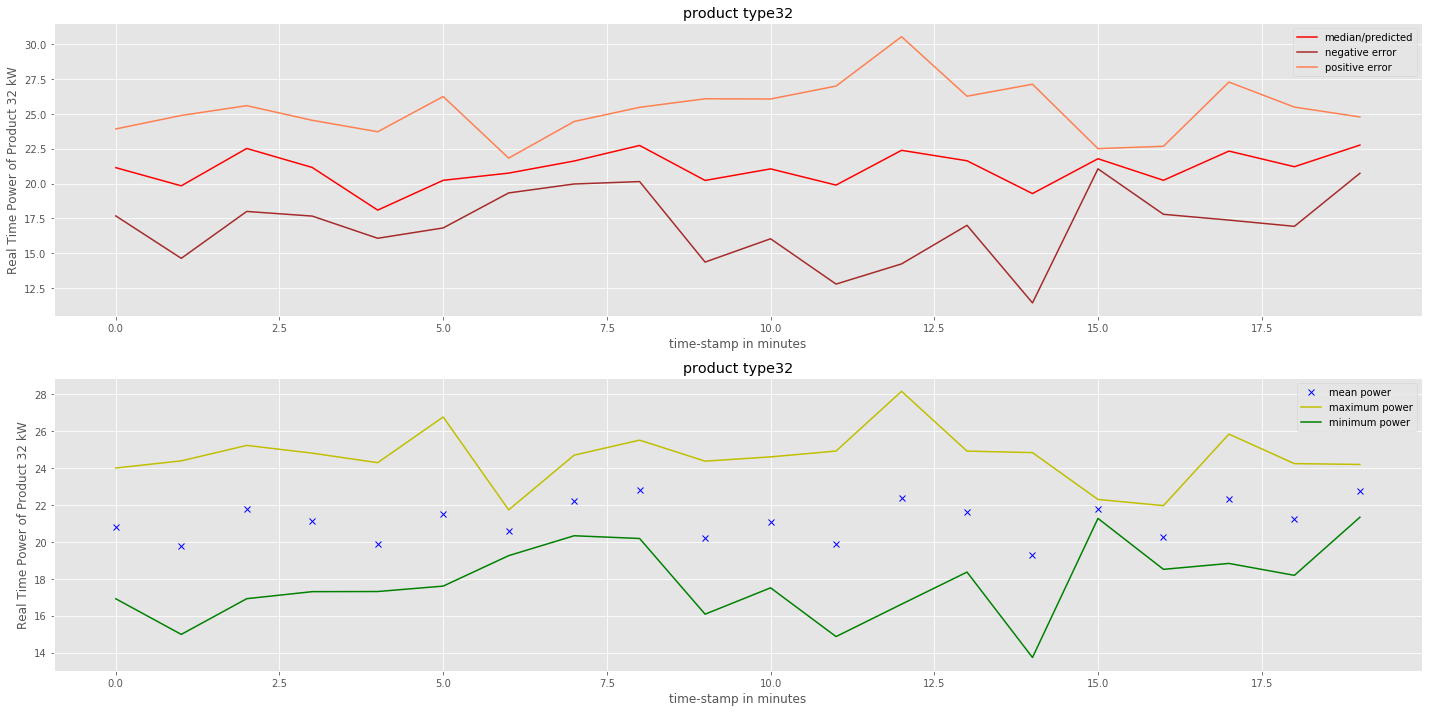

standard deviation is 1.94461638021


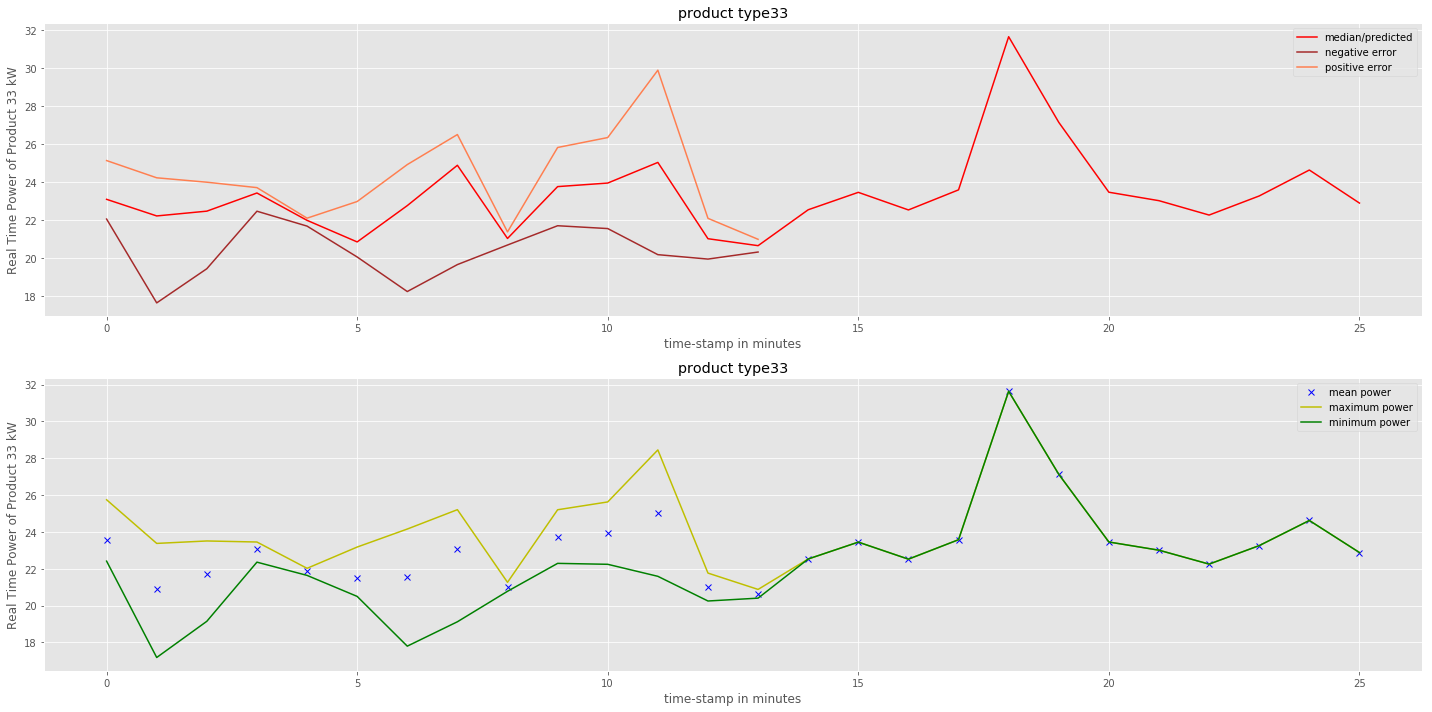

[3.4993612495580368, 3.6870306571611344, 3.7488058768225527, 3.0375338296172174, 3.5994465013966237, 3.784276895700394, 3.7676070563774253, 3.9310503842926572, 2.9469031745838019, 3.4666073752802822, 3.8693268210946399, 3.1957144086139548, 3.2147139267096527, 3.4149995613224315, 2.7341769828343323, 3.8423087534031906, 3.744967775378214, 3.6177364972793216, 3.9982883138418761, 2.9746252294687774, 3.5118072046767335, 3.532862770841172, 3.8769922273043442, 3.0184334558342241, 3.5520083214647347, nan, nan, 3.5922207268351505, 3.2150844904493332, 2.438878912286393, 2.8411753962604567, 4.1579192104221345, 1.944616380212306]
[66, 54, 61, 92, 88, 75, 89, 103, 66, 75, 57, 46, 48, 53, 26, 64, 13, 52, 38, 81, 42, 37, 28, 47, 57, 0, 0, 15, 24, 49, 51, 20, 14]
['116_1038408484', '115_1038307052', '116_1038307052', '115_1038305585', '116_1038305585', '115_1038408318', '116_1038408318', '115_1038408484', '115_1038305594', '115_1038407804', '116_1038305594', '116_1038407804', '115_1038407806', '116_10

In [10]:
filename3 = 'my_excel_file1_corrected.xlsx'

i = 1
print (list1)
mean_standard = []
quantities_n = []

while (i <= unique_sets):
    df1 = pd.read_excel(filename3, sheetname='Sheet1')
    df1 = df1[df1.PRODUCT_TYPE == i]
    df1 = df1[["TIME","ACTIVEPOWER","PRODUCT_TYPE", "BATCH_TYPE"]]
    x = df1.BATCH_TYPE.unique()
    jj = []
    for kk in range(len(x)):
        jj.append([])
        df2 = df1[df1.BATCH_TYPE == x[kk]]
        df2 = df2.values
        aa, bb = df2.shape
        ref_time = 0
        for ll in range(aa):
            jj[kk].append(df2[ll][1])
    
    jj = pd.DataFrame(jj)
    median_var = jj.median()
    standard_deviation_from_mean_value = jj.std()
    max_value = jj.max()
    min_value = jj.min()
    mean_value = jj.mean()
    mv_list = pd.Series.tolist(median_var)
    std_mean_list = pd.Series.tolist(standard_deviation_from_mean_value)
    s_m = np.asarray(std_mean_list)
    ppp = s_m.size
    countttt_batch_size = 0
    for variables in range(ppp):
        if np.isnan(s_m[variables]):
            countttt_batch_size += 1
    mean_std_dev = np.nanmean(s_m)
    mean_standard.append(mean_std_dev)
    quantities_n.append(ppp - countttt_batch_size)
    print("standard deviation is " + str(mean_std_dev))
    mval_list = pd.Series.tolist(max_value)
    min_val_l = pd.Series.tolist(min_value)
    mean_val_list = pd.Series.tolist(mean_value)
    neg_err = [b_i - a_i for a_i, b_i in zip(std_mean_list, mean_val_list)]
    pos_err = [b_i + a_i for a_i, b_i in zip(std_mean_list, mean_val_list)]
    
    y_a = list(range(0, len(mv_list)))
    y_label = "Real Time Power of Product " + str(i) + " kW"
    plt.figure(1, figsize=(20,10))
    plt.subplot(211)
    plt.plot(y_a, mv_list, 'r', label='median/predicted')
    plt.plot(y_a, neg_err, 'brown', label='negative error')
    plt.plot(y_a, pos_err, 'coral', label='positive error')
    plt.title("product type" + str(i))
    plt.xlabel('time-stamp in minutes')
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout()
    plt.subplot(212)
    plt.plot(y_a, mean_val_list, 'bx', label='mean power')
    plt.plot(y_a, mval_list, 'y', label='maximum power')
    plt.plot(y_a, min_val_l, 'g', label='minimum power')
    plt.title("product type" + str(i))
    plt.xlabel('time-stamp in minutes')
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    i += 1

mean_standard_array1 = mean_standard
timestamp_quantity_considered = quantities_n

print (mean_standard)
print (quantities_n)
print (list1)
list1_new = []
mean_standard_new = []
quantities_n_new = []
product_number = []
for i in range(len(mean_standard)):
    if str(mean_standard[i]) != 'nan':
        mean_standard_new.append(mean_standard[i])
        quantities_n_new.append(quantities_n[i])
        list1_new.append(list1[i])
        product_number.append(i+1)

mean_standard = mean_standard_new
quantities_n = quantities_n_new
list1 = list1_new
print (mean_standard)
print (quantities_n)
print (list1)
print (product_number)

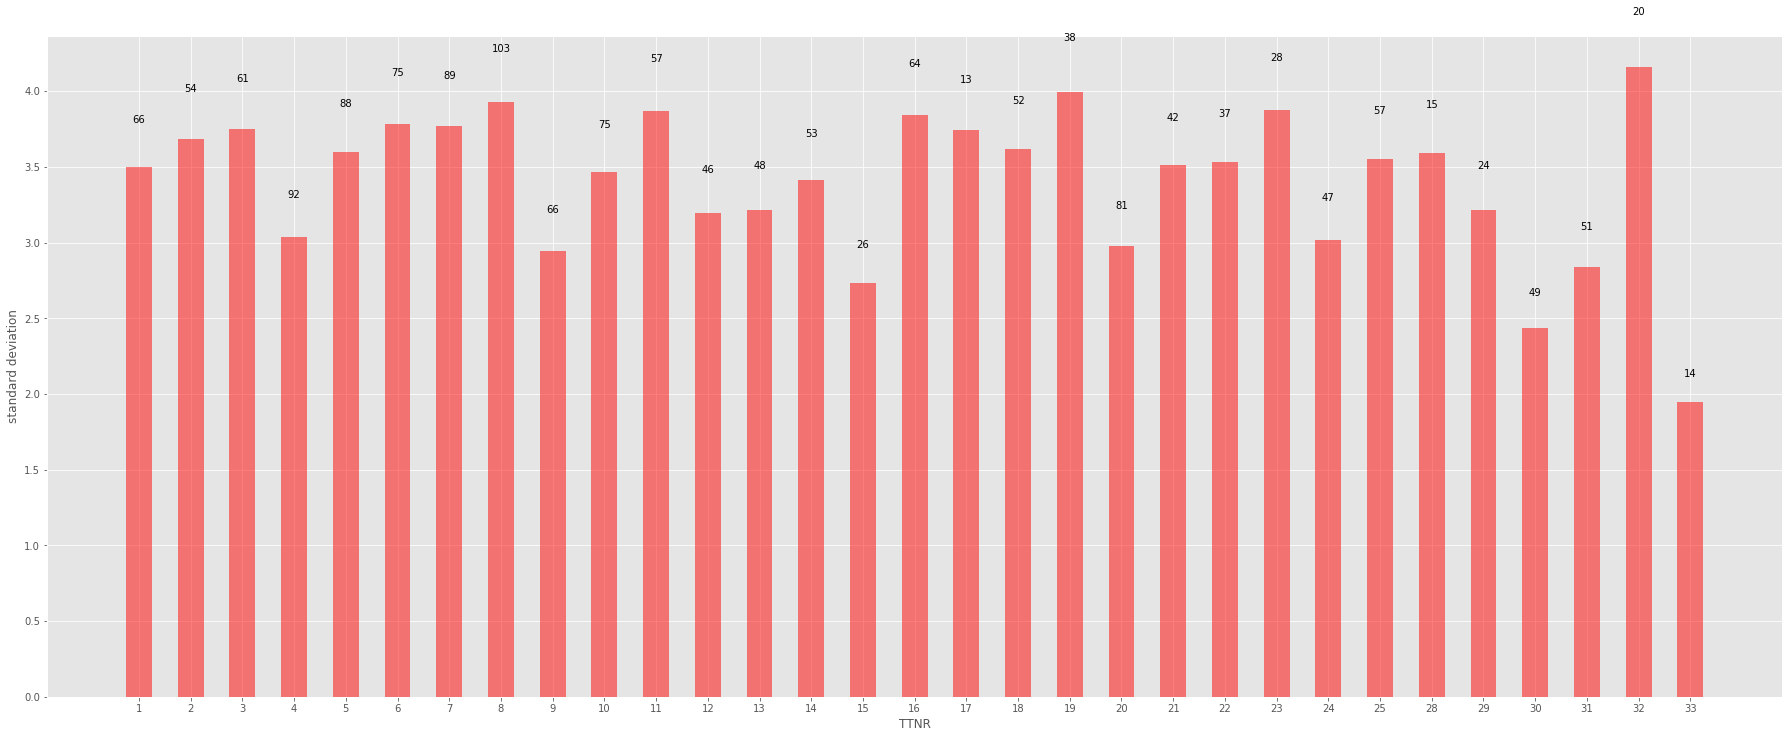

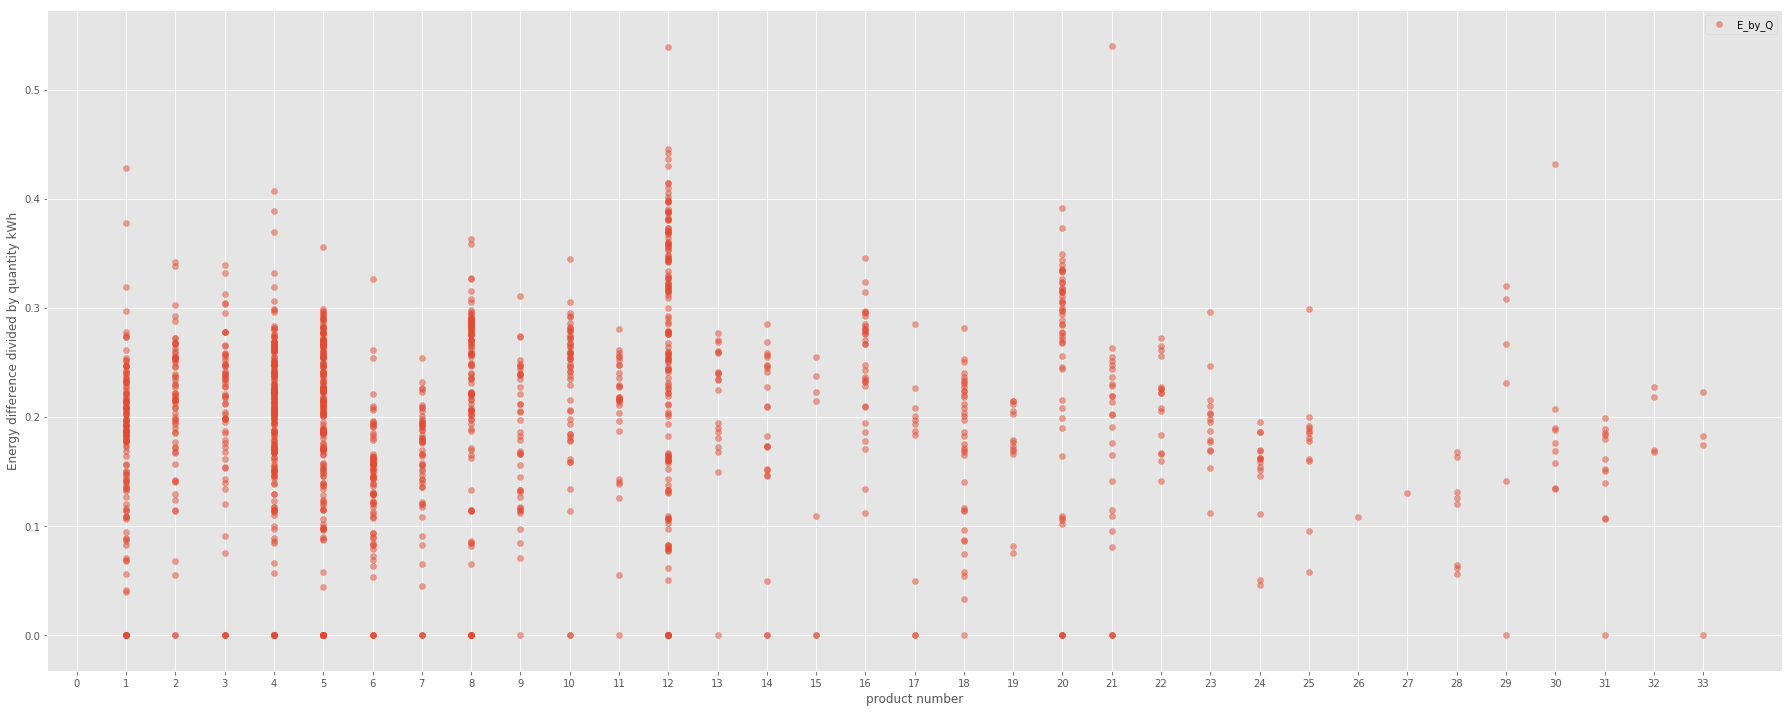

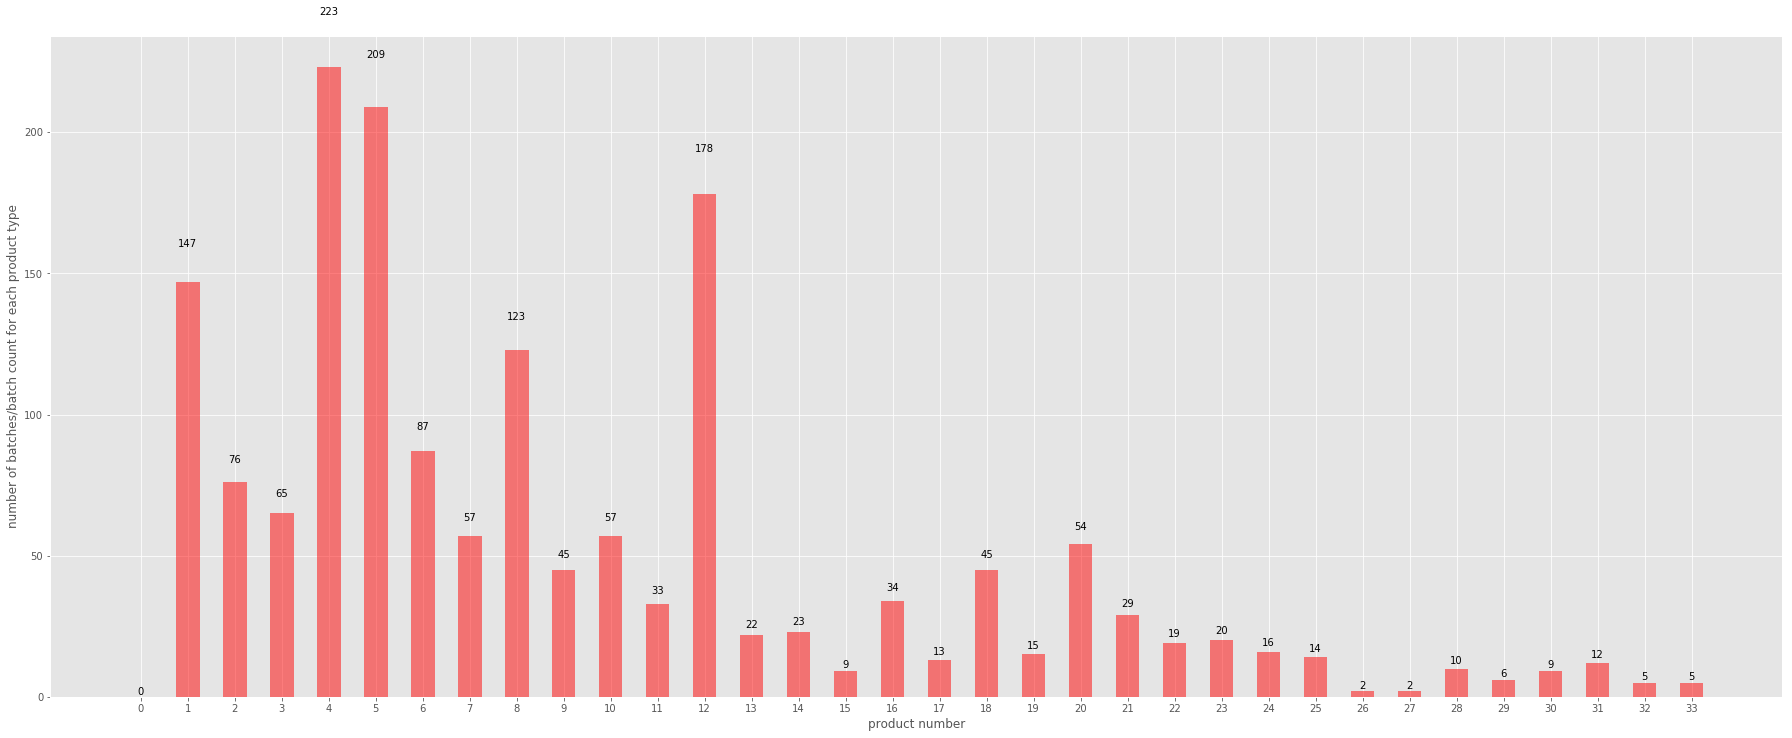

In [11]:
width = 0.5
y_pos = np.arange(len(product_number))
fig, ax = plt.subplots(figsize=(25, 10))
rects = ax.bar(y_pos, mean_standard, width ,color='r', align='edge' ,alpha=0.5)
ax.set_xticks(y_pos + width/2.)
ax.set_xticklabels(product_number, fontsize=10)
ax.set_xlabel('TTNR')
ax.set_ylabel('standard deviation')
def autolabel(rects,ii):
    for rect in rects:
        height = rect.get_height()
        values = quantities_n[ii]
        value1 = product_number[ii] + 1
        value2 = mean_standard[ii]
        ii += 1
        ax.text(rect.get_x() + rect.get_width()/2., 1.08*height,
                '%s' %(str(values)),
                ha='center', va='bottom', fontsize=10)
autolabel(rects, 0)
plt.tight_layout()
plt.show()

filename3 = 'e_by_q.xlsx'
for i in range(unique_sets):
    df1 = pd.read_excel(filename3, sheetname='Sheet1')
    y_label = "Energy difference divided by quantity kWh"
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.scatter(df1['PRODUCT_TYPE'], df1['E_by_Q'], alpha=0.5)
    ax.set_xlabel('product number')
    ax.set_ylabel(y_label)
    ax.set_xticks(np.arange(unique_sets + 1))
    plt.legend()
    plt.tight_layout()
    plt.show()
    break

y_label = "number of batches/batch count for each product type"
width = 0.5
y_pos = np.arange(len(buckets1))
fig, ax = plt.subplots(figsize=(25, 10))
rects = ax.bar(y_pos, buckets, width ,color='r', align='center' ,alpha=0.5)
ax.set_xlabel('product number')
ax.set_ylabel(y_label)
ax.set_xticks(np.arange(unique_sets + 1))
def autolabel(rects,ii):
    for rect in rects:
        height = rect.get_height()
        value = buckets[ii]
        ii += 1
        ax.text(rect.get_x() + rect.get_width()/2., 1.08*height,
                '%s' %(str(value)),
                ha='center', va='bottom', fontsize=10)
autolabel(rects, 0)
plt.tight_layout()
plt.show()

In [12]:
b1 = buckets
b2 = buckets1
b1.pop(0)
b2.pop(0)

0

In [21]:
product_type_data = list(zip(b2, b1, list_process_number, ttnr_list, mean_standard_array1, timestamp_quantity_considered))
df1 = pd.DataFrame(product_type_data)
df1.columns = ['Product_No.', 'total_batch_No.', 'Process_no.', 'TTNR_val', 'mean_std_var', 'tstamp_freq.(for taking standard deviation average)']
df1

Product_No.  total_batch_No. Process_no.    TTNR_val  mean_std_var  \
0             1              147         116  1038408484      3.499361   
1             2               76         115  1038307052      3.687031   
2             3               65         116  1038307052      3.748806   
3             4              223         115  1038305585      3.037534   
4             5              209         116  1038305585      3.599447   
5             6               87         115  1038408318      3.784277   
6             7               57         116  1038408318      3.767607   
7             8              123         115  1038408484      3.931050   
8             9               45         115  1038305594      2.946903   
9            10               57         115  1038407804      3.466607   
10           11               33         116  1038305594      3.869327   
11           12              178         116  1038407804      3.195714   
12           13               22         115  1038407806      3.214714   
13           14               23         116  1038407806      3.415000   
14           15                9         115  1038408272      2.734177   
15           16               34         115  1038408104      3.842309   
16           17               13         116  1038408272      3.744968   
17           18               45         116  1038408104      3.617736   
18           19               15         115  1038407334      3.998288   
19           20               54         115  F005V16903      2.974625   
20           21               29         116  1038407334      3.511807   
21           22               19         115  1038408462      3.532863   
22           23               20         116  1038408462      3.876992   
23           24               16         115  1038407754      3.018433   
24           25               14         116  1038407754      3.552008   
25           26                2         115  1038305588           NaN   
26           27                2         116  1038305588           NaN   
27           28               10         115  1038407332      3.592221   
28           29                6         116  1038407332      3.215084   
29           30                9         115  1038408840      2.438879   
30           31               12         116  1038408840      2.841175   
31           32                5         115  1038305359      4.157919   
32           33                5         116  1038305359      1.944616   

    tstamp_freq.(for taking standard deviation average)  
0                                                  66    
1                                                  54    
2                                                  61    
3                                                  92    
4                                                  88    
5                                                  75    
6                                                  89    
7                                                 103    
8                                                  66    
9                                                  75    
10                                                 57    
11                                                 46    
12                                                 48    
13                                                 53    
14                                                 26    
15                                                 64    
16                                                 13    
17                                                 52    
18                                                 38    
19                                                 81    
20                                                 42    
21                                                 37    
22                                                 28    
23                                                 47    
24                                   